# Jupyter Path

In [1]:
# Run All 이후 모든 결과가 출력되는데 약간의 시간이 소요됩니다!
# GUI tkinter 실행은 Chrome이 설치되어 있는 환경에서 작동합니다.
# '씽크빅팀' 폴더를 그대로 jupyter 최상위 디렉터리에 upload하면 무리없이 작동하도록 노트북을 작성했습니다.

Jupyter_path = 'C:/Users/82104' # GUI tkinter 실행을 위한 주피터 노트북의 절대경로를 입력해주세요('.'에 해당하는 부분 입력)
file_path = './씽크빅팀' # 주피터 노트북 상에서 씽크빅팀 폴더의 상대경로 혹은 절대 경로를 입력해주세요 

# Install

In [2]:
from IPython.display import clear_output

!pip install missingno
!pip install selenium
!pip install folium

clear_output(wait=True)

# Library

In [3]:
import warnings

import numpy as np
import pandas as pd 
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from PIL import Image as im
from IPython.display import Image as im

import folium as fo
from folium import Map, Marker, Circle
from folium import Icon, Popup

import selenium as se
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait

from tkinter import *

# Version

In [4]:
import sys
print('Python_Version : ' + sys.version)
print('Numpy_Version : ' + np.__version__)
print('Pandas_Version : ' + pd.__version__)
print('Matplotlib_Version : ' + matplotlib.__version__)
print('Seaborn_version : ' + sns.__version__)
print('Missingno_version : ' + msno.__version__)
print('Selenium_version : ' + se.__version__)
print('folium_version : ' + fo.__version__)

Python_Version : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Numpy_Version : 1.21.5
Pandas_Version : 1.4.4
Matplotlib_Version : 3.5.2
Seaborn_version : 0.11.2
Missingno_version : 0.5.1
Selenium_version : 4.7.2
folium_version : 0.14.0


# Data Import

In [5]:
# [Dataset] : https://www.kaggle.com/datasets/bappekim/air-pollution-in-seoul
air_quality_dataset = pd.read_csv('{}/seoul_air_1988_2021.csv'.format(file_path))
display(air_quality_dataset.head())
print(air_quality_dataset.info())

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988010100,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988010100,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988010100,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988010100,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988010100,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5984782 entries, 0 to 5984781
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   dt      int64  
 1   loc     int64  
 2   lat     float64
 3   long    float64
 4   so2     float64
 5   no2     float64
 6   co      float64
 7   o3      float64
 8   pm10    float64
 9   pm2.5   float64
dtypes: float64(8), int64(2)
memory usage: 456.6 MB
None


### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Preprocessing

## 'dt' column에 대한 시간 전처리 by pd.to_datetime

In [6]:
air_quality_dataset['dt'] = pd.to_datetime(air_quality_dataset['dt'],format='%Y%m%d%H')
air_quality_dataset['year'] = air_quality_dataset['dt'].dt.year
air_quality_dataset['month'] = air_quality_dataset['dt'].dt.month
air_quality_dataset['day'] = air_quality_dataset['dt'].dt.day
air_quality_dataset['hour'] = air_quality_dataset['dt'].dt.hour
air_quality_dataset['ts'] = pd.to_datetime(air_quality_dataset['dt'], format='%Y-%m-%d-%H')
air_quality_dataset = air_quality_dataset.drop(columns='dt')
air_quality_dataset

,loc,lat,long,so2,no2,co,o3,pm10,pm2.5,year,month,day,hour,ts
0,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN,1988,1,1,0,1988-01-01 00:00:00
1,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN,1988,1,1,0,1988-01-01 00:00:00
2,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN,1988,1,1,0,1988-01-01 00:00:00
3,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN,1988,1,1,0,1988-01-01 00:00:00
4,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN,1988,1,1,0,1988-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984777,121,37.487359,126.924913,0.003,0.027,0.5,0.016,21.0,9.0,2021,12,31,23,2021-12-31 23:00:00
5984778,122,37.504547,126.992308,0.003,0.021,0.4,0.023,16.0,10.0,2021,12,31,23,2021-12-31 23:00:00
5984779,123,37.517546,127.045775,0.003,0.019,0.4,0.024,18.0,6.0,2021,12,31,23,2021-12-31 23:00:00
5984780,124,37.502688,127.090327,0.003,0.025,0.5,0.020,21.0,8.0,2021,12,31,23,2021-12-31 23:00:00


## 결측치 확인 by Missingno library

<AxesSubplot:>

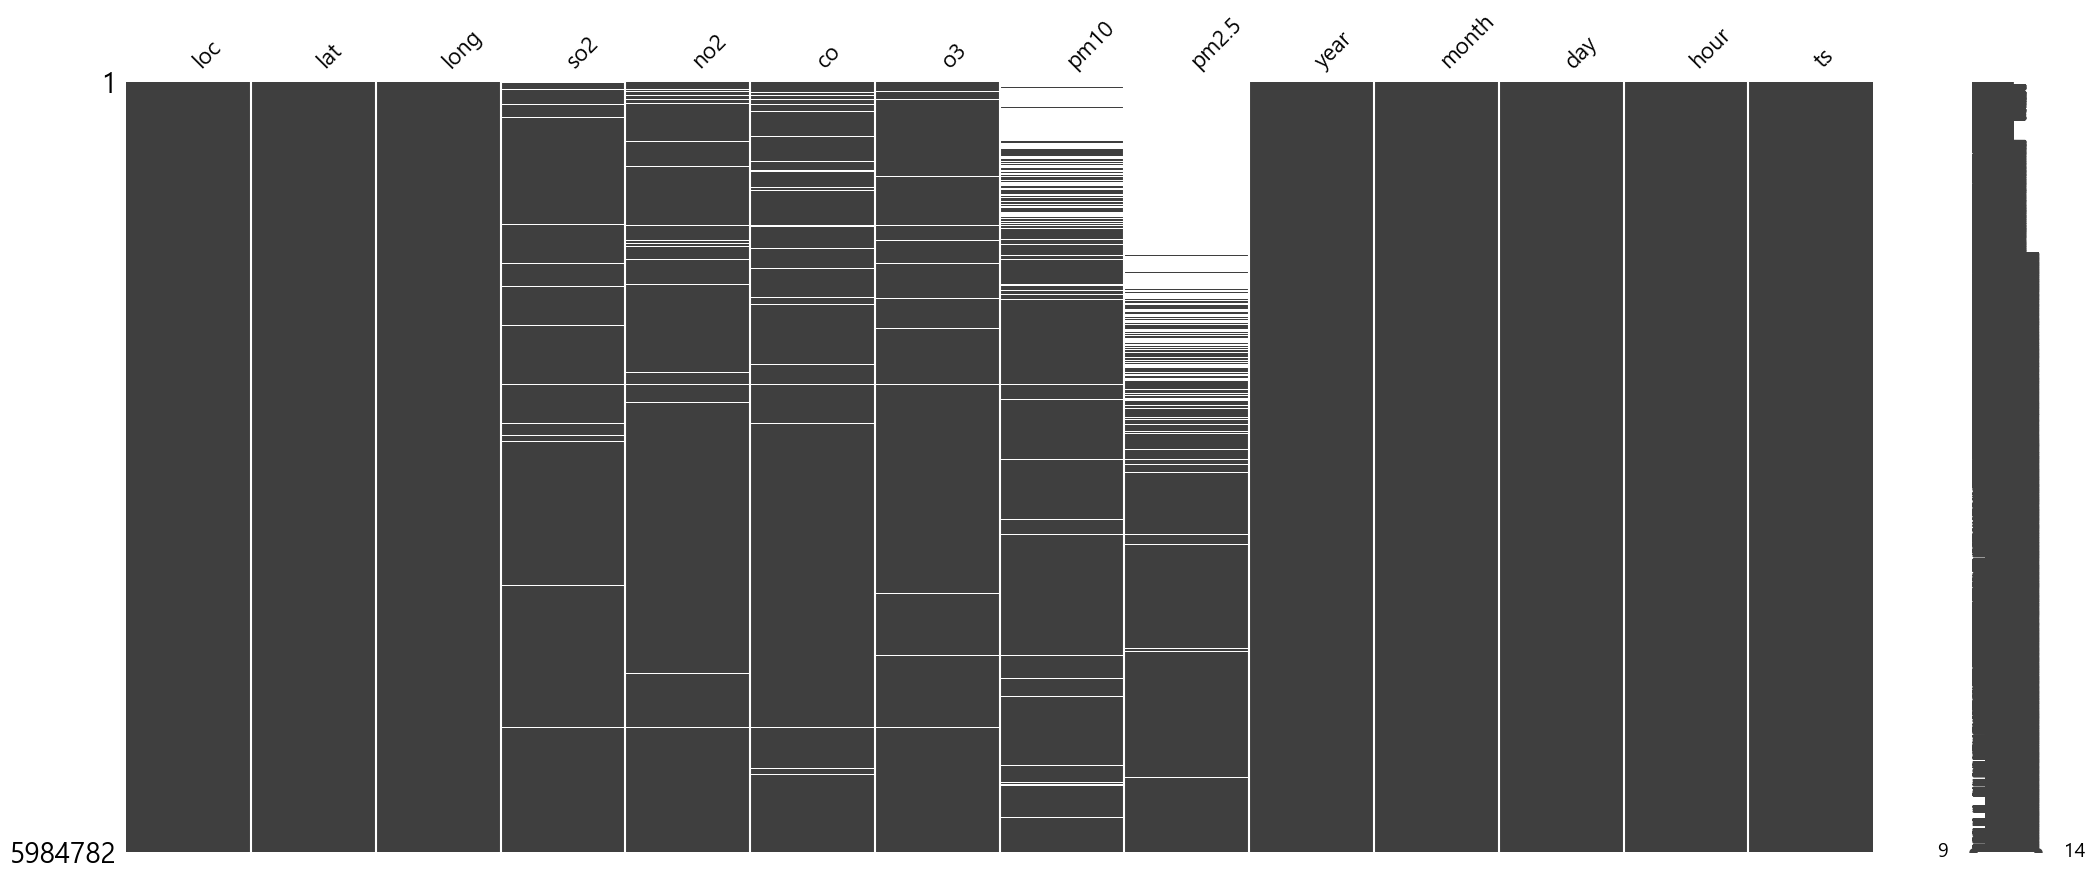

In [7]:
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

msno.matrix(air_quality_dataset)

###### -> SO2, NO2, CO, O3, pm10, pm2.5 column에는 다양한 결측치가 존재한다.
##### 시계열 데이터이므로 무조건적으로 행을 삭제하는 것보다는 최대한 데이터를 살리는 방향으로 전처리를 진행한다. (Data Imputation)
##### 특히,  pm 2.5와 10에 있는 결측치를 어떻게 처리할 것인지 고민해본다. 

## 연도에 따른 pm2.5와 pm10의 결측치 

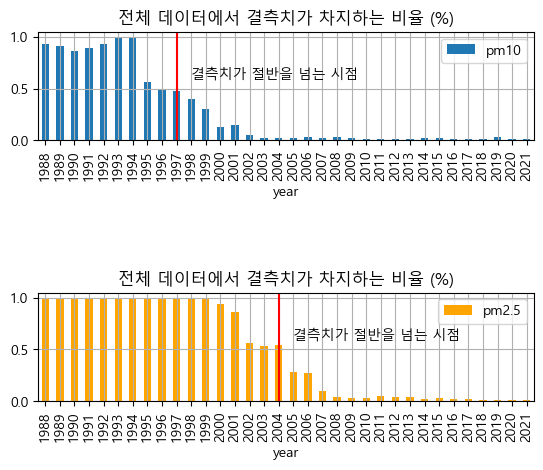

In [8]:
# pm10
plt.subplot(3, 1, 1)
air_quality_dataset['pm10'].isnull().groupby(air_quality_dataset['year']).mean().plot(kind='bar',grid=True) # 연도별 pm10 데이터의 결측치 평균
plt.rc("font", family='Malgun Gothic') # 한글 폰트 설정
plt.title("전체 데이터에서 결측치가 차지하는 비율 (%)") # 그래프에 제목 넣기
plt.axvline(x=9,color='r')
plt.text(10, 0.6, '결측치가 절반을 넘는 시점')
plt.legend() # 범례 나타내기

# pm2.5 
plt.subplot(3, 1, 3)
air_quality_dataset['pm2.5'].isnull().groupby(air_quality_dataset['year']).mean().plot(kind='bar',color='orange',grid=True)
plt.rc("font", family='Malgun Gothic') 
plt.title("전체 데이터에서 결측치가 차지하는 비율 (%)")
plt.axvline(x=16,color='r')
plt.text(17, 0.6, '결측치가 절반을 넘는 시점')
plt.legend()
plt.show()

###### -> 가장 큰 규모의 범주형 변수인 연도에 따른 pm10, pm2.5 변화를 관찰한 결과 특정 연도 이전에 결측치가 몰려있음을 확인할 수 있다.

## 연도에 따른 데이터의 분포

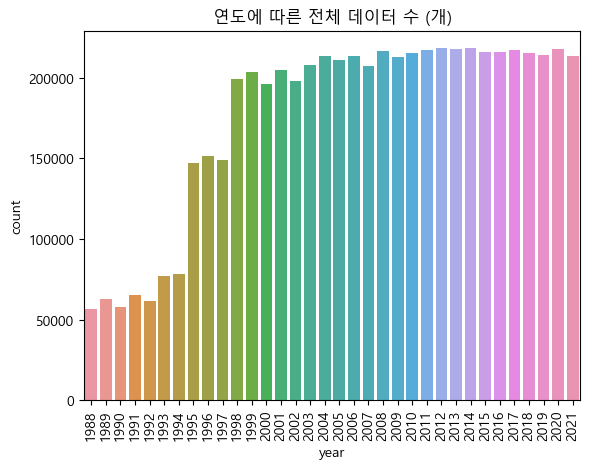

In [9]:
plt.title('연도에 따른 전체 데이터 수 (개)')
sns.countplot(air_quality_dataset['year'])
plt.xticks(rotation=90)
plt.show()

###### -> 특정 연도 자체에 데이터가 부족한 것을 확인할 수 있다.

## 연도별 데이터 사이의 차이가 시간 데이터의 결측치 때문에 발생한 것인지 확인

In [10]:
# 1988년 1월 1일 0시 ~ 2021년 12월 31일 23시의 시간 데이터 생성
date_idx = pd.date_range('1988-01-01-00','2021-12-31-23',freq='H') 
series_ts = pd.Series(date_idx, range(len(date_idx)))
series_ts = pd.DataFrame(series_ts, columns=['dt']) # 연도, 월, 일, 시에 대한 column으로 분해(기존 dataset과의 form 맞춤)
series_ts['dt'] = pd.to_datetime(series_ts['dt'],format='%Y-%m-%d-%H')
series_ts['year'] = series_ts['dt'].dt.year
series_ts['month'] = series_ts['dt'].dt.month
series_ts['day'] = series_ts['dt'].dt.day
series_ts['hour'] = series_ts['dt'].dt.hour

# air_quality_dataset 중 시간 데이터를 전처리 한 부분을 서브쿼리로 구성
sub_query = air_quality_dataset.iloc[:,-5:-1] 

# 두 df에 대해 outer_join 연산(right_only에 해당하는 시간은 결측치)
compare_df = pd.merge(series_ts, sub_query, how='outer', indicator=True) 
result_na = compare_df.query('_merge == "right_only"').drop(columns=['_merge'])
print('전체 시간 중 데이터가 존재하지 않는 시점은 {}개 입니다.'.format(len(result_na)))

전체 시간 중 데이터가 존재하지 않는 시점은 0개 입니다.


###### -> 전체 제시된 시간 중 특정 시점의 데이터가 결측된 것이 앞선 결과의 원인은 아닌 것을 알 수 있다.

## 연도별 데이터 사이의 차이가 측정 장소의 차이 때문에 발생한 것인지 확인

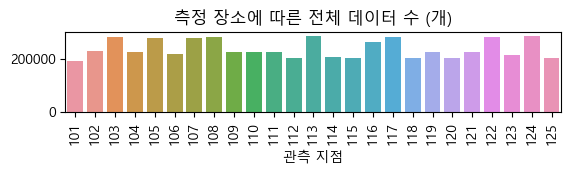

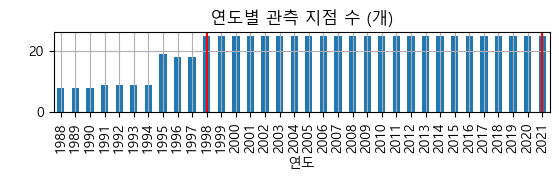

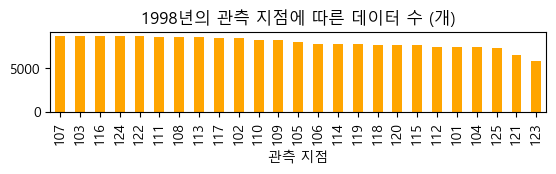

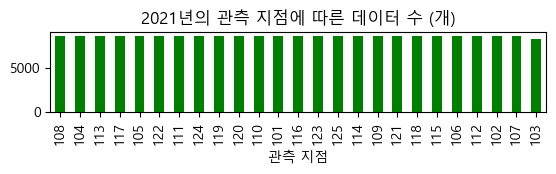

In [11]:
# 측정 장소에 따른 데이터 분포
plt.subplot(4, 1, 1)
plt.title('측정 장소에 따른 전체 데이터 수 (개)')
sns.countplot(air_quality_dataset['loc'])
plt.xticks(rotation=90)
plt.xlabel('관측 지점')
plt.ylabel(None)
plt.show()

# 연도별 관측 장소의 분포
plt.subplot(4, 1, 2)
plt.title('연도별 관측 지점 수 (개)')
air_quality_dataset['loc'].groupby(air_quality_dataset['year']).nunique().plot(kind='bar', grid=True)
plt.axvline(x=10,color='r')
plt.axvline(x=33,color='r')
plt.xlabel('연도')
plt.ylabel('        ')
plt.show()

# 1998년의 관측 장소에 따른 데이터 수 분포
plt.subplot(4, 1, 3)
plt.title('1998년의 관측 지점에 따른 데이터 수 (개)')
year_1998_df = air_quality_dataset[air_quality_dataset['year']==1998]
year_1998_df['loc'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('관측 지점')
plt.show()

# 2021년의 관측 장소에 따른 데이터 수 분포
plt.subplot(4, 1, 3)
plt.title('2021년의 관측 지점에 따른 데이터 수 (개)')
year_2021_df = air_quality_dataset[air_quality_dataset['year']==2021]
year_2021_df['loc'].value_counts().plot(kind='bar',color='green')
plt.xlabel('관측 지점')
plt.show()

###### -> 연도별 관측 지점의 수를 확인한 결과 1998년 전으로는 관측 지점 수에 차이가 있었으며, 관측 지점별로도 데이터의 수에 차이가 존재한다.

## pm10과 pm2.5의 결측치 처리를 위한 변수간 관계 파악

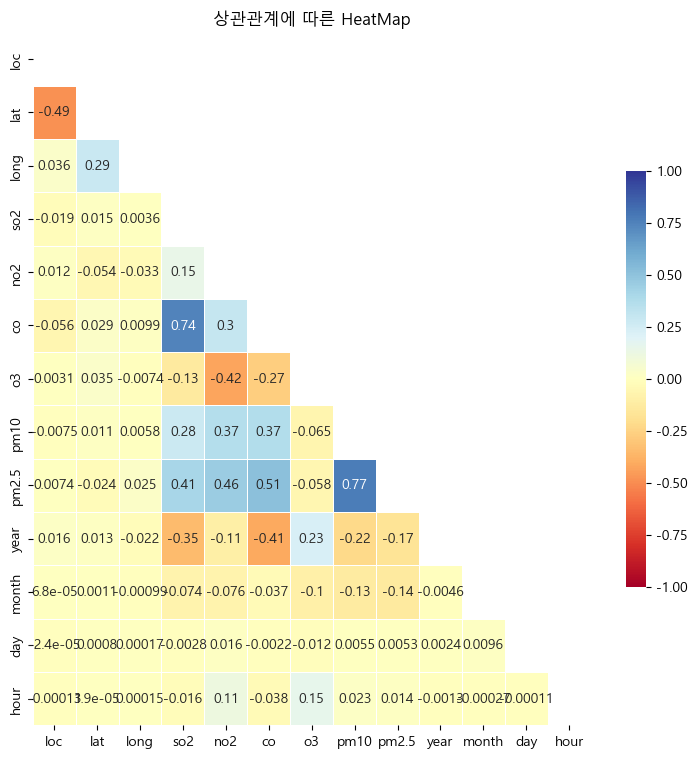

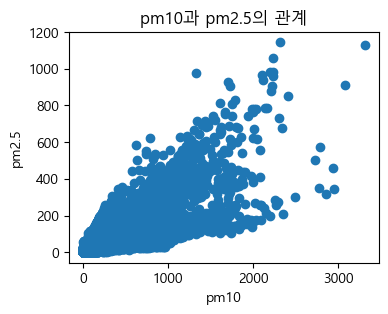

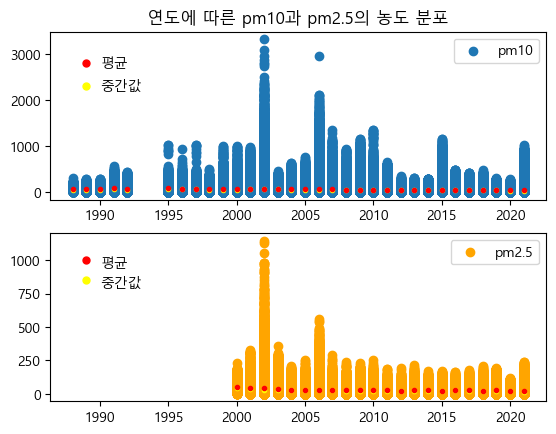

In [12]:
# 상관계수에 따른 HeatMap
corr_df = air_quality_dataset.corr() # 상관계수
fig, ax = plt.subplots(figsize=(9,9))

mask = np.zeros_like(corr_df, dtype=np.bool) # 삼각형 마스크
mask[np.triu_indices_from(mask)] = True
plt.title('상관관계에 따른 HeatMap')
sns.heatmap(corr_df, # 히트맵
            cmap = 'RdYlBu', 
            annot = True,   # 실제 값
            mask=mask,      # 표시하지 않을 마스크 부분
            linewidths=.5,  # 경계면 실선
            cbar_kws={"shrink": .6},# 컬러바 크기 0.6배
            vmin = -1.0, vmax = 1.0)   # 컬러바 범위 -1 ~ 1
plt.show()


# pm10과 pm2.5의 상관관계 분석
plt.figure(figsize=(4,3))
plt.title('pm10과 pm2.5의 관계')
plt.scatter(air_quality_dataset['pm10'],air_quality_dataset['pm2.5'])
plt.xlabel('pm10')
plt.ylabel('pm2.5')
plt.show()


# 가장 높은 상관관계를 가지는 두 변수 pm10과 pm2.5의 연도에 따른 농도 분포
ax1 = plt.subplot(2, 1, 1) # pm10
plt.title('연도에 따른 pm10과 pm2.5의 농도 분포')
plt.scatter(air_quality_dataset['year'],air_quality_dataset['pm10'], label='pm10')
for i in range(34):
    plt.plot([1988+i], [air_quality_dataset[air_quality_dataset['year']==1988+i]['pm10'].median()], 'o', markersize=3, c='yellow') # 평균
    plt.plot([1988+i], [air_quality_dataset[air_quality_dataset['year']==1988+i]['pm10'].mean()], 'o', markersize=3, c='red') # 중간값
plt.plot([1989], [2800], 'o', markersize=5, c='red')
plt.text(1990, 2700,'평균', fontdict={'size': 10})
plt.plot([1989], [2300], 'o', markersize=5, c='yellow')
plt.text(1990, 2200,'중간값', fontdict={'size': 10})
plt.legend()

ax2 = plt.subplot(2, 1, 2, sharex=ax1)  # pm2.5
plt.scatter(air_quality_dataset['year'],air_quality_dataset['pm2.5'], label='pm2.5', color='orange')
for i in range(34):
    plt.plot([1988+i], [air_quality_dataset[air_quality_dataset['year']==1988+i]['pm2.5'].median()], 'o', markersize=3, c='yellow') # 평균
    plt.plot([1988+i], [air_quality_dataset[air_quality_dataset['year']==1988+i]['pm2.5'].mean()], 'o', markersize=3, c='red') # 중간값
plt.plot([1989], [1000], 'o', markersize=5, c='red')
plt.text(1990, 950,'평균', fontdict={'size': 10})
plt.plot([1989], [850], 'o', markersize=5, c='yellow')
plt.text(1990, 800,'중간값', fontdict={'size': 10})
plt.legend()
plt.show()


###### -> 원활한 데이터 분석을 위해 결측치를 처리해야 한다. 
###### 문제가 되는 부분은 2000년 이전의 pm2.5 데이터이므로 이와 높은 상관계수를 가지는 변수를 통해 결측치 대체값을 구할 수 있는지 확인한다.
###### 변수간 양의 상관계수가 가장 높은 pm10과 pm2.5를 비교해본 결과 연도별 평균과 중간값은 큰 차이가 없으나, 연도별 편차가 어느정도 나타나고
###### 동일한 시점에 대해 두 변수의 분포가 항상 유사하지는 않았다. 따라서 결측된  수많은 pm2.5의 데이터를 모두 대체하기는 무리가 있다고 판단하고
###### 문제가 되는 시점을 기준으로 데이터를 두 시점으로 분할하여 데이터를 분석하였다. (문제 시점을 기준으로 데이터를 나누어도 데이터가 충분하므로)

## 데이터셋의 분할

In [13]:
old_data = air_quality_dataset[air_quality_dataset['year']<2000] # 결측치가 많은 1988~2000의 데이터
recent_data = air_quality_dataset[air_quality_dataset['year']>=2000] # 2001년부터 2021년까지의 데이터

##### -> 단순 결측치만 고려한다면 pm2.5의 결측치가 많은 2000년의 경우도 제외해야 하지만,  2000년에는 co column의 특이한 데이터가 다수 존재하기에
##### 2000년은 포함하고 2000년~2021년 데이터에 대해 결측치를 처리한 후 데이터를 분석한다.
##### (1988년~1999년의 데이터는 시계열 경향성 등을 분석하는 과정에서 참고하는 용도로만 사용한다.)

## 공기의 질과 관련된 변수들의 분포 확인

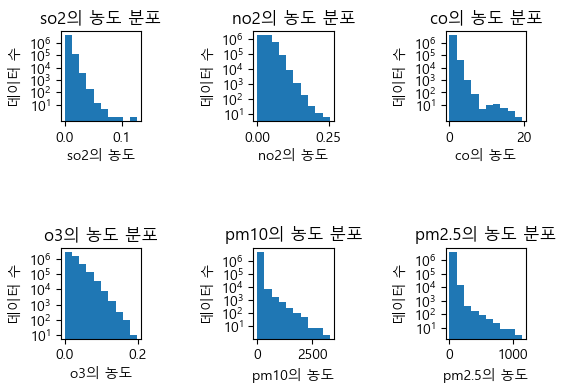

In [14]:
# so2에 대한 LogScale histogram
plt.figure(figsize=(6,4))
plt.subplot(3, 5, 1)
plt.title('so2의 농도 분포')
plt.hist(recent_data['so2'],log=True)
plt.xlabel('so2의 농도')
plt.yticks([10**1,10**2,10**3,10**4,10**5,10**6])
plt.ylabel('데이터 수')

# no2에 대한 LogScale histogram
plt.subplot(3, 5, 3)
plt.title('no2의 농도 분포')
plt.hist(recent_data['no2'],log=True)
plt.xlabel('no2의 농도')
plt.yticks([10**1,10**2,10**3,10**4,10**5,10**6])
plt.ylabel('데이터 수')

# co에 대한 LogScale histogram
plt.subplot(3, 5, 5)
plt.title('co의 농도 분포')
plt.hist(recent_data['co'],log=True)
plt.xlabel('co의 농도')
plt.yticks([10**1,10**2,10**3,10**4,10**5,10**6])
plt.ylabel('데이터 수')

# o3에 대한 LogScale histogram
plt.subplot(3, 5, 11)
plt.title('o3의 농도 분포')
plt.hist(recent_data['o3'],log=True)
plt.xlabel('o3의 농도')
plt.yticks([10**1,10**2,10**3,10**4,10**5,10**6])
plt.ylabel('데이터 수')

# pm10에 대한 LogScale histogram
plt.subplot(3, 5, 13)
plt.title('pm10의 농도 분포')
plt.hist(recent_data['pm10'],log=True)
plt.xlabel('pm10의 농도')
plt.yticks([10**1,10**2,10**3,10**4,10**5,10**6])
plt.ylabel('데이터 수')

# pm2.5에 대한 LogScale histogram
plt.subplot(3, 5, 15)
plt.title('pm2.5의 농도 분포')
plt.hist(recent_data['pm2.5'],log=True)
plt.xlabel('pm2.5의 농도')
plt.ylabel('데이터 수')
plt.yticks([10**1,10**2,10**3,10**4,10**5,10**6])
plt.show()

##### -> 공기의 질에 영향을 주는 변수들의 분포 자체는 대부분 연속적이며, log 스케일을 적용했기에 다수의 데이터는 저농도에 해당함을 알 수 있다.
#####  pm10과 pm2.5의 경우는 값의 범위가 넓고 큰 값을 가질수록 데이터의 개수가 적은 모습이 관찰되므로 outlier의 경우를 고려해야 한다. 

## 결측치와 이상치 처리

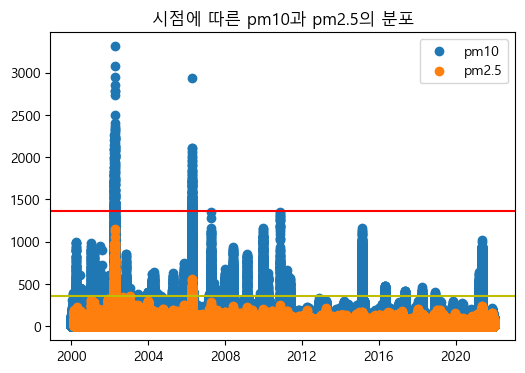

<pm10과 pm2.5의 농도가 높게 측정된 시점>


array(['2002-03-21T09:00:00.000000000', '2002-03-21T10:00:00.000000000',
       '2002-03-21T11:00:00.000000000', '2002-03-21T12:00:00.000000000',
       '2002-03-21T13:00:00.000000000'], dtype='datetime64[ns]')

array(['2002-03-15T16:00:00.000000000', '2002-03-21T10:00:00.000000000',
       '2002-03-21T11:00:00.000000000', '2002-03-21T12:00:00.000000000',
       '2002-03-21T13:00:00.000000000'], dtype='datetime64[ns]')

유난히 pm10과 pm2.5의 농도가 높았던 날은 : 2002년 3월 21,22일, 2002년 4월 7,8,9일, 2006년 4월 8,9일


In [15]:
# 이상치(outlier) 확인
plt.figure(figsize=(6,4))
plt.title('시점에 따른 pm10과 pm2.5의 분포')
plt.scatter(recent_data['ts'],recent_data['pm10'],label='pm10')
plt.scatter(recent_data['ts'],recent_data['pm2.5'],label='pm2.5')
plt.axhline(y=1360,color='r')
plt.axhline(y=360,color='y')
plt.legend()
plt.show()

# 이상치의 후보 시점
pm10_list = recent_data[recent_data['pm10']>1360]['ts'].unique()
pm2_list = recent_data[recent_data['pm2.5']>360]['ts'].unique()
print('<pm10과 pm2.5의 농도가 높게 측정된 시점>')
display(pm10_list[0:5],pm2_list[0:5])
print('유난히 pm10과 pm2.5의 농도가 높았던 날은 : 2002년 3월 21,22일, 2002년 4월 7,8,9일, 2006년 4월 8,9일')

##### -> pm10의 농도가 높은 날은 대체적으로 pm2.5 역시 높게 나타난다.(시기를 보았을 때 황사로 추정)
##### 데이터에는 유난히 pm10과 pm2.5의 농도가 높은 시점이 존재한다.
##### 데이터들이 대체로 연속적으로 분포하기에 우선 이상치를 따로 선별하지는 않지만 추후 threshold 적용 가능성을 염두한다.

so2 column별 평균값에 대한 최대 표준편차는 0.0010449034545253067입니다.
no2 column별 평균값에 대한 최대 표준편차는 0.005828205250020761입니다.
co column별 평균값에 대한 최대 표준편차는 0.13197734685423929입니다.
o3 column별 평균값에 대한 최대 표준편차는 0.00849448443797602입니다.
pm10 column별 평균값에 대한 최대 표준편차는 12.543551841219942입니다.
pm2.5 column별 평균값에 대한 최대 표준편차는 6.808615519356849입니다.


<AxesSubplot:>

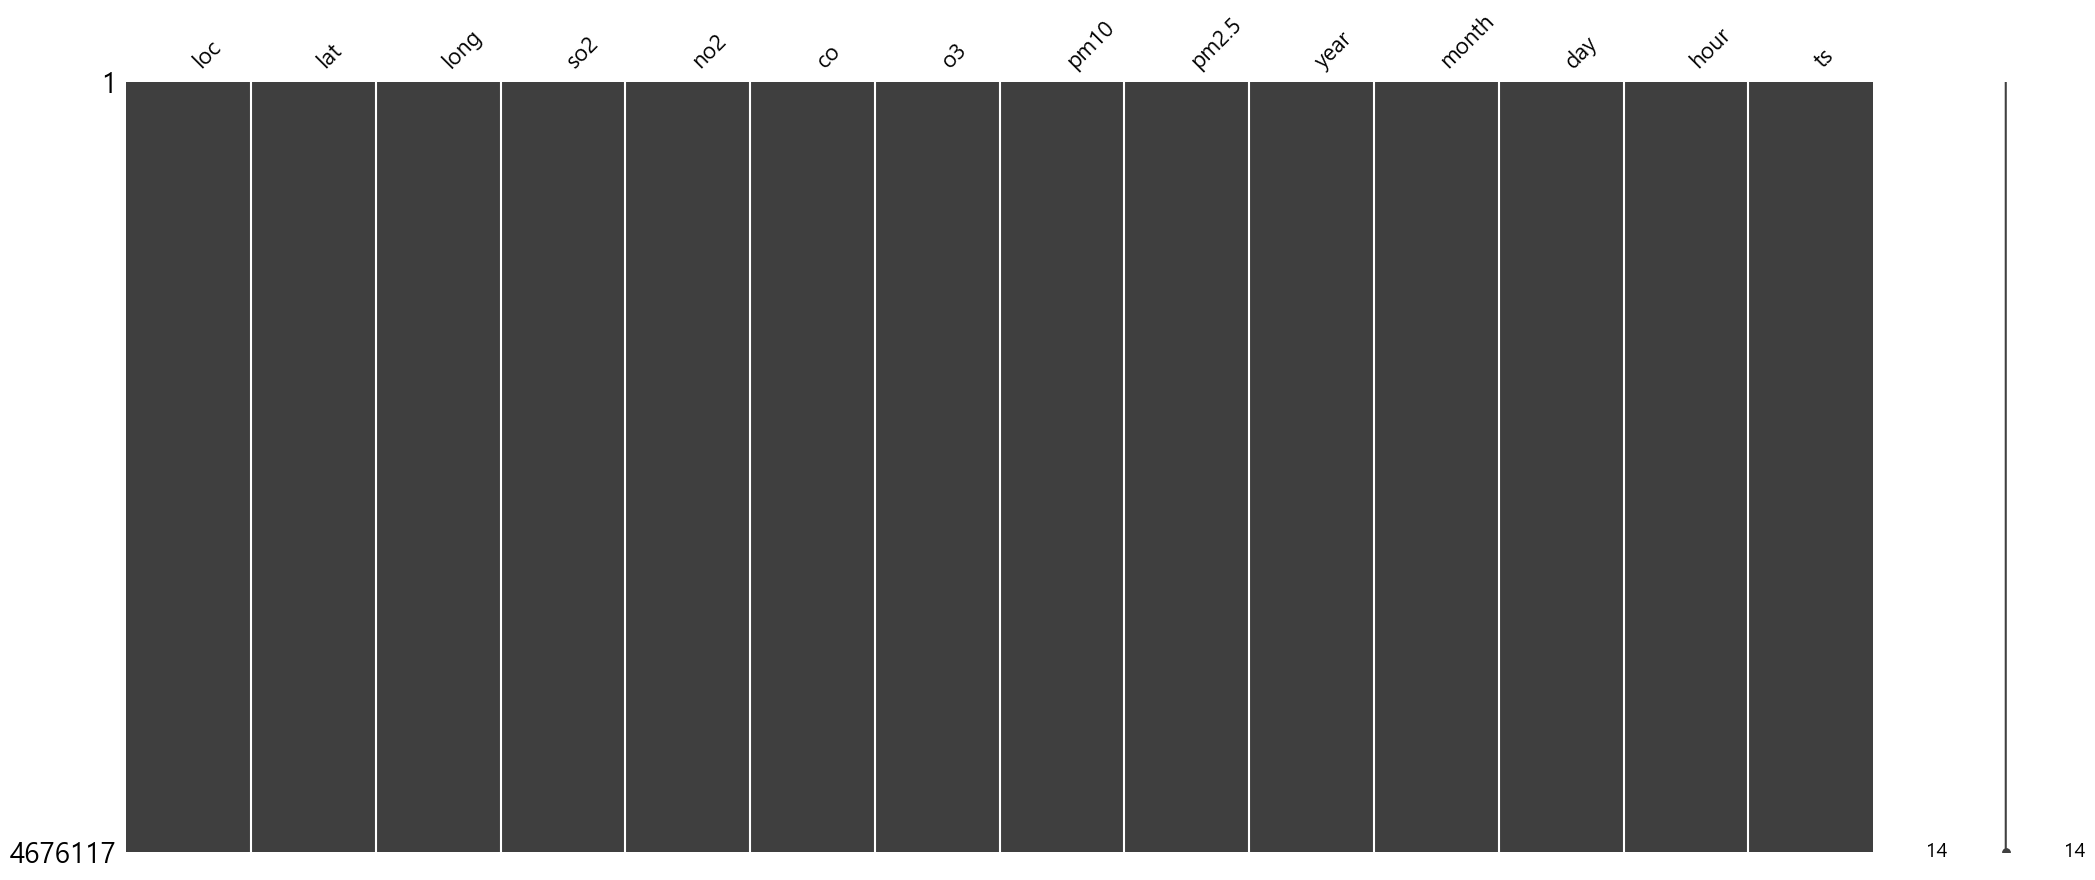

In [16]:
# 결측치 대체 (Data Imputation)
cat_col = ['loc', 'year', 'month', 'day', 'hour']
target_col = ['so2', 'no2', 'co', 'o3', 'pm10', 'pm2.5']
std_list = []
i=0

# column별 평균값에 대한 표준편차 조사
for a in target_col:
    for b in cat_col:
        std = recent_data.groupby(b)[a].mean().std()
        std_list.append(std)
for c in target_col :
    print('{} column별 평균값에 대한 최대 표준편차는 {}입니다.'.format(c,max(std_list[i:i+5]))) 
    i = i+5  # 월별 평균값의 표준편차는 약 12이므로 추가적인 max threshold 등을 지정하지 않는다.
    
# so2, no2, o3는 평균값에 대한 최대 표준편차 차이가 크지 않으므로 column별 평균값으로, 
mean_col = ['so2','no2','o3']
for col in mean_col:
    recent_data[col] = recent_data[col].fillna(recent_data[col].mean())
    

# 나머지는 편차가 큰 month별 평균값으로 결측치 대체
group_col = ['co', 'pm10', 'pm2.5']
for col in group_col:
        recent_data[col] = recent_data[col].fillna(recent_data.groupby('month')[col].transform('mean'))
        
# 결측치 확인        
msno.matrix(recent_data)

##### -> column별 결측치를 처리하기 위해 column별 가장 민감한 값을 가지는 범주형 column을 범주별 평균값에 대한 표준편차를 비교하는 방식으로 
##### 확인한다. 범주별 평균값간의 표준편차가 적은 데이터는 해당 column의 평균값으로, 표준편차가 어느정도 나타나는 데이터는 범주별 평균값으로
##### 결측치를 대체한다.

## AQI(Air Quality Index) 파생변수

In [17]:
# AQI를 구하기 위한 함수 정의

# pm2.5 전처리 함수
def get_pm25_subindex2(x):
    if x <= 12:
        return x * 50 / 12
    elif x <= 35.4:
        return 50 + (x - 12.1) * 50 / 23.1
    elif x <= 150.4:
        return 100 + (x - 35.5) * 100 / 114.9
    elif x <= 250.4:
        return 200 + (x - 150.5) * 100 / 100
    elif x <= 350.4:
        return 300 + (x - 250.5) * 100 / 100
    elif x <= 500.4:
        return 400 + (x - 350.5) * 100 / 150
    else:
        return 500

# pm10 전처리 함수
def get_pm10_subindex2(x):
    if x <= 54:
        return x * 50 / 54
    elif x <= 154:
        return 50 + (x - 55) * 50 / 99
    elif x <= 354:
        return 100 + (x - 155) * 100 / 199
    elif x <= 424:
        return 200 + (x - 355) * 100 / 69
    elif x <= 504:
        return 300 + (x - 425) * 100 / 79
    elif x <= 605:
        return 400 + (x - 505) * 100 / 100
    else:
        return 500

# so2 전처리 함수
def get_so2_subindex2(x):
    if x <= 0.035:
        return x * 50 / 0.035
    elif x <= 0.075:
        return 50 + (x - 0.036) * 50 / 0.039
    elif x <= 0.304:
        return 100 + (x - 0.076) * 100 / 0.228
    elif x <= 0.604:
        return 200 + (x - 0.305) * 100 / 0.3
    elif x <= 0.804:
        return 300 + (x - 0.605) * 100 / 0.199
    elif x <= 1.0:
        return 400 + (x - 0.805) * 100 / 0.2
    else:
        return 500

# no2 전처리 함수
def get_no2_subindex2(x):
    if x <= 0.053:
        return x * 50 / 0.053
    elif x <= 0.1:
        return 50 + (x - 0.054) * 50 / 0.046
    elif x <= 0.649:
        return 100 + (x - 0.101) * 100 / 0.548
    elif x <= 1.249:
        return 200 + (x - 0.650) * 100 / 0.550
    elif x <= 1.649:
        return 300 + (x - 1.250) * 100 / 0.4
    elif x <= 2.050:
        return 400 + (x - 1.650) * 100 / 0.4
    else:
        return 500
    
# co 전처리 함수
def get_co_subindex2(x):
    if x <= 4.4:
        return x * 50 / 4.4
    elif x <= 9.4:
        return 50 + (x - 4.5) * 50 / 4.9
    elif x <= 15.4:
        return 100 + (x - 9.5) * 100 / 5.9
    elif x <= 30.4:
        return 200 + (x - 15.5) * 100 / 15
    elif x <= 40.4:
        return 300 + (x - 30.5) * 100 / 10
    elif x <= 50.4:
        return 400 + (x - 40.5) * 100 / 10
    else:
        return 500

# o3 전처리 함수
def get_o3_subindex2(x):
    if x <= 0.054:
        return x * 50 / 0.054
    elif x <= 0.07:
        return 50 + (x - 0.055) * 50 / 0.015
    elif x <= 0.105:
        return 100 + (x - 0.071) * 100 / 0.034
    elif x <= 0.2:
        return 200 + (x - 0.106) * 100 / 0.1
    else:
        return 500
    
# AQI Bucketing 함수
def get_AQI_bucket2(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

    
# AQI를 계산하기 위해 pm10, pm2.5의 직전 24시간동안의 평균, so2, no2의 1시간동안의 평균, co, o3의 직전 8시간 동안의 평균값을 저장 
recent_data["pm10_24hr_avg"] = recent_data.groupby('loc')["pm10"].rolling(window=24, min_periods = 1).mean().values
recent_data["pm2.5_24hr_avg"] = recent_data.groupby('loc')["pm2.5"].rolling(window=24, min_periods = 1).mean().values
recent_data["so2_1hr_avg"] = recent_data.groupby('loc')["so2"].rolling(window=1, min_periods = 1).mean().values
recent_data["no2_1hr_avg"] = recent_data.groupby('loc')["no2"].rolling(window=1, min_periods = 1).mean().values
recent_data["co_8hr_avg"] = recent_data.groupby('loc')["co"].rolling(window=8, min_periods = 1).mean().values
recent_data["o3_8hr_avg"] = recent_data.groupby('loc')["o3"].rolling(window=8, min_periods = 1).mean().values


# 앞서 정의한 함수를 이용하여 항목별 전처리
recent_data["pm10_SubIndex"] = recent_data["pm10_24hr_avg"].apply(lambda x: get_pm10_subindex2(x))
recent_data["pm2.5_SubIndex"] = recent_data["pm2.5_24hr_avg"].apply(lambda x: get_pm25_subindex2(x))
recent_data["so2_SubIndex"] = recent_data["so2_1hr_avg"].apply(lambda x: get_so2_subindex2(x))
recent_data["no2_SubIndex"] = recent_data["no2_1hr_avg"].apply(lambda x: get_no2_subindex2(x))
recent_data["co_SubIndex"] = recent_data["co_8hr_avg"].apply(lambda x: get_co_subindex2(x))
recent_data["o3_SubIndex"] = recent_data["o3_8hr_avg"].apply(lambda x: get_o3_subindex2(x))


# 지표가 몇 개 구해졌는지 Check
recent_data["Checks"] = (recent_data["pm2.5_SubIndex"] > 0).astype(int) + \
                (recent_data["pm10_SubIndex"] > 0).astype(int) + \
                (recent_data["so2_SubIndex"] > 0).astype(int) + \
                (recent_data["no2_SubIndex"] > 0).astype(int) + \
                (recent_data["co_SubIndex"] > 0).astype(int) + \
                (recent_data["o3_SubIndex"] > 0).astype(int)

recent_data["Checkover"] = (recent_data["pm2.5_SubIndex"] > 200).astype(int) + \
                (recent_data["pm10_SubIndex"] > 200).astype(int) + \
                (recent_data["so2_SubIndex"] > 200).astype(int) + \
                (recent_data["no2_SubIndex"] > 200).astype(int) + \
                (recent_data["co_SubIndex"] > 200).astype(int) + \
                (recent_data["o3_SubIndex"] > 200).astype(int)

In [18]:
# AQI 구하기
recent_data["AQI"] = round(recent_data[["pm2.5_SubIndex", "pm10_SubIndex", "so2_SubIndex", "no2_SubIndex","co_SubIndex", "o3_SubIndex"]].max(axis = 1))
recent_data.loc[recent_data["Checkover"] == 2, "AQI"] += 50 # AQI가 200 이상인 요인이 2개라면 AQI +50
recent_data.loc[recent_data["Checkover"] > 2, "AQI"] += 75 # AQI가 200 이상인 요인이 2개 이상이라면 AQI +75
recent_data[recent_data["AQI"]>500]['AQI'] = 500 

# 조건 1: pm2.5와 pm10의 전처리값 합이 0 이하라면 AQI 값 X
recent_data.loc[recent_data["pm2.5_SubIndex"] + recent_data["pm10_SubIndex"] <= 0, "AQI"] = np.NaN

# 조건 2: 지표의 개수 합이 3 미만이라면 AQI 값 X
recent_data.loc[recent_data["Checks"] < 3, "AQI"] = np.NaN

# AQI 수치에 따른 Bucketing
recent_data["AQI_bucket_calculated"] = recent_data["AQI"].apply(lambda x: get_AQI_bucket2(x))

# AQI 수치가 없는 경우는 대시보드 활용을 위해 평균값으로 결측치 대체(극소수의 데이터)
recent_data['AQI'].fillna(recent_data['AQI'].mean(),inplace=True)
recent_data["AQI_bucket_calculated"] = recent_data["AQI"].apply(lambda x: get_AQI_bucket2(x))

# 필요 없어진 column 제거
recent_data = recent_data.drop(columns=['pm2.5_SubIndex','pm10_SubIndex','so2_SubIndex','no2_SubIndex','co_SubIndex','o3_SubIndex','Checks','pm10_24hr_avg','pm2.5_24hr_avg','so2_1hr_avg','no2_1hr_avg','co_8hr_avg','o3_8hr_avg','Checkover'])

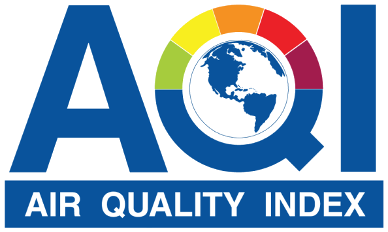

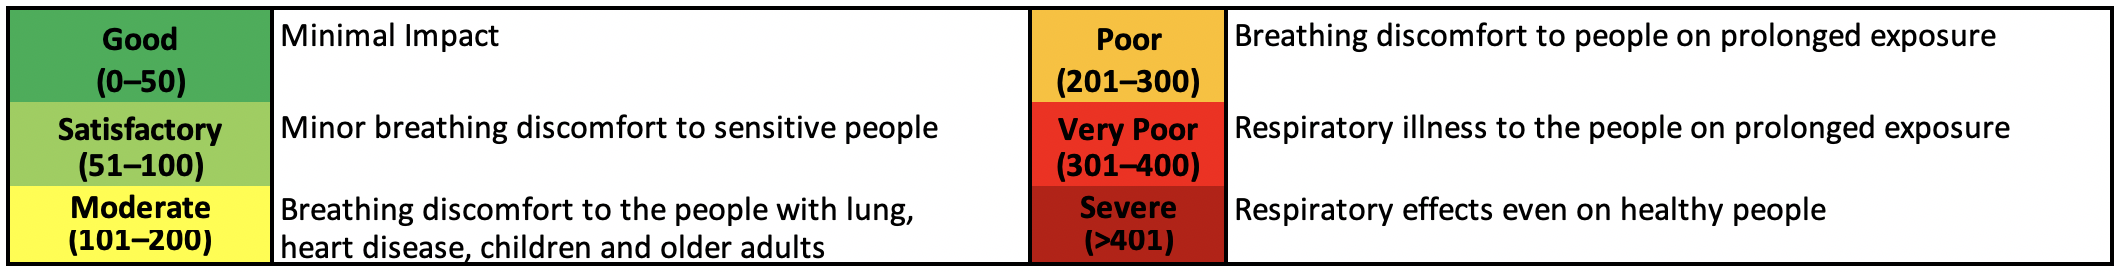

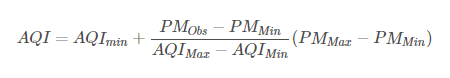

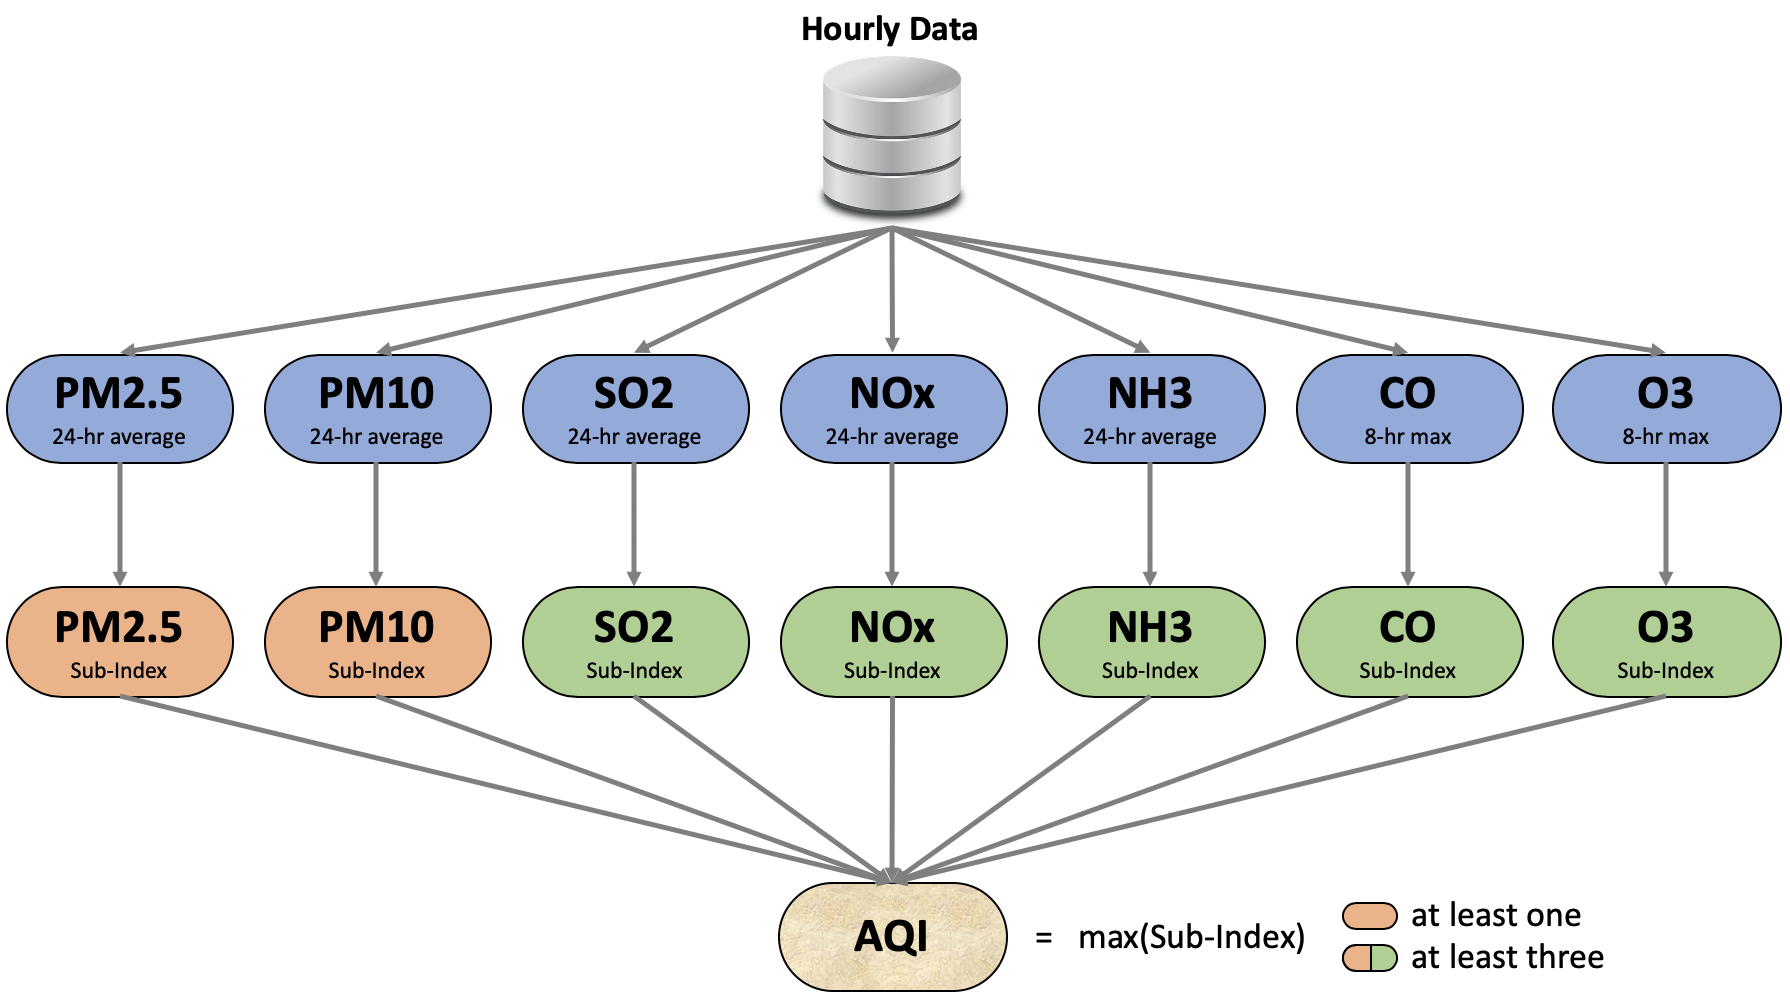

,loc,lat,long,so2,no2,co,o3,pm10,pm2.5,year,month,day,hour,ts,AQI,AQI_bucket_calculated
1308665,101,37.572021,127.002819,0.004992,0.050,2.1,0.001000,118.000000,31.16735,2000,1,1,0,2000-01-01 00:00:00,91.0,Satisfactory
1308666,102,37.564302,126.972863,0.004992,0.045,0.2,0.020263,57.582766,31.16735,2000,1,1,0,2000-01-01 00:00:00,91.0,Satisfactory
1308667,103,37.540037,127.002661,0.008000,0.047,1.7,0.003000,57.582766,31.16735,2000,1,1,0,2000-01-01 00:00:00,91.0,Satisfactory
1308668,106,37.555595,126.903372,0.008000,0.025,0.1,0.003000,10.000000,31.16735,2000,1,1,0,2000-01-01 00:00:00,91.0,Satisfactory
1308669,109,37.575703,127.026520,0.005000,0.052,0.1,0.004000,11.000000,31.16735,2000,1,1,0,2000-01-01 00:00:00,91.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984777,121,37.487359,126.924913,0.003000,0.027,0.5,0.016000,21.000000,9.00000,2021,12,31,23,2021-12-31 23:00:00,28.0,Good
5984778,122,37.504547,126.992308,0.003000,0.021,0.4,0.023000,16.000000,10.00000,2021,12,31,23,2021-12-31 23:00:00,29.0,Good
5984779,123,37.517546,127.045775,0.003000,0.019,0.4,0.024000,18.000000,6.00000,2021,12,31,23,2021-12-31 23:00:00,28.0,Good
5984780,124,37.502688,127.090327,0.003000,0.025,0.5,0.020000,21.000000,8.00000,2021,12,31,23,2021-12-31 23:00:00,27.0,Good


In [19]:
# show image
image1 = im(filename = '{}/aqi.png'.format(file_path), width=200,height=200)
image2 = im(filename = '{}/aqi_index.png'.format(file_path), width=900,height=300)
image3 = im(filename = '{}/aqi_formula2.png'.format(file_path), width=600,height=300)
image4 = im(filename = '{}/aqi_formula.png'.format(file_path), width=600,height=300)
display(image1,image2)
display(image3,image4)
display(recent_data)

##### -> 공기의 질을 알 수 있는 AQI 지표를 계산하여 column으로 추가한다.
##### AQI 지수는 0과 50 사이에서 공기의 질이 좋음을,  51과 100 사이에서 적당함을,  101과 200 사이에서 노약자들에게 안좋을 수 있음을,
##### 201과 300 사이에서 좋지 않음을,  301과 400 사이에서 매우 좋지 않음을,  400 이상에서는 심각함을 나타내는 대기 지표이다.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Analysis

## HeatMap

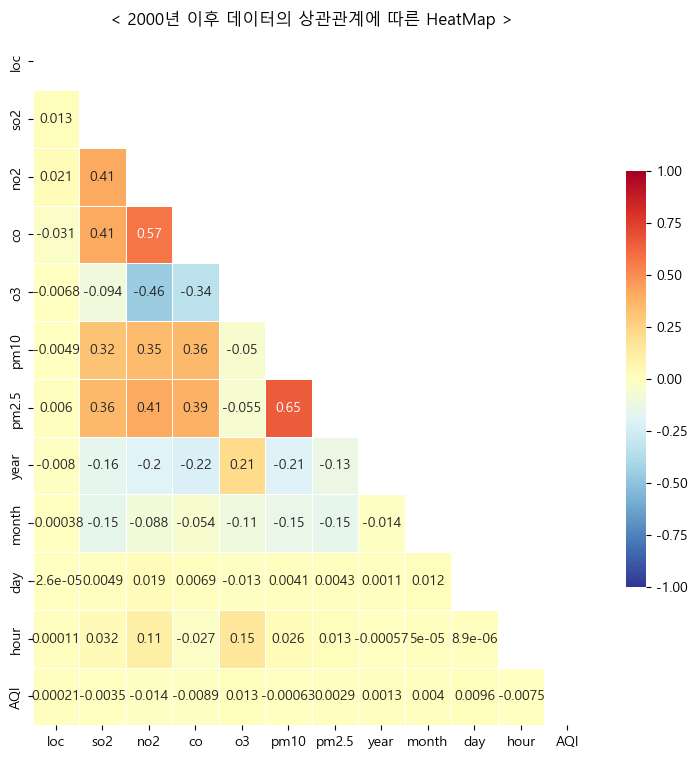

In [20]:
# 상관계수에 따른 HeatMap
heatmap_data = recent_data.drop(columns=['lat','long']) # lat과 long은 관측소의 위도와 경도이므로 고려 대상이 아니다.
corr_df = heatmap_data.corr() # 상관계수
fig, ax = plt.subplots(figsize=(9,9))

mask = np.zeros_like(corr_df, dtype=np.bool) # 삼각형 마스크
mask[np.triu_indices_from(mask)] = True
plt.title('< 2000년 이후 데이터의 상관관계에 따른 HeatMap >')
sns.heatmap(corr_df, # 히트맵
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .6},
            vmin = -1.0, vmax = 1.0)
plt.show()

##### -> 주로 공기 질에 영향을 끼치는 변수간에서 가장 높은 상관관계를, 다음으로는 년, 월과 같은 시계열 변수와 물질간에서 높은 상관관계를 갖는다.

## 다양한 변수간의 상관관계

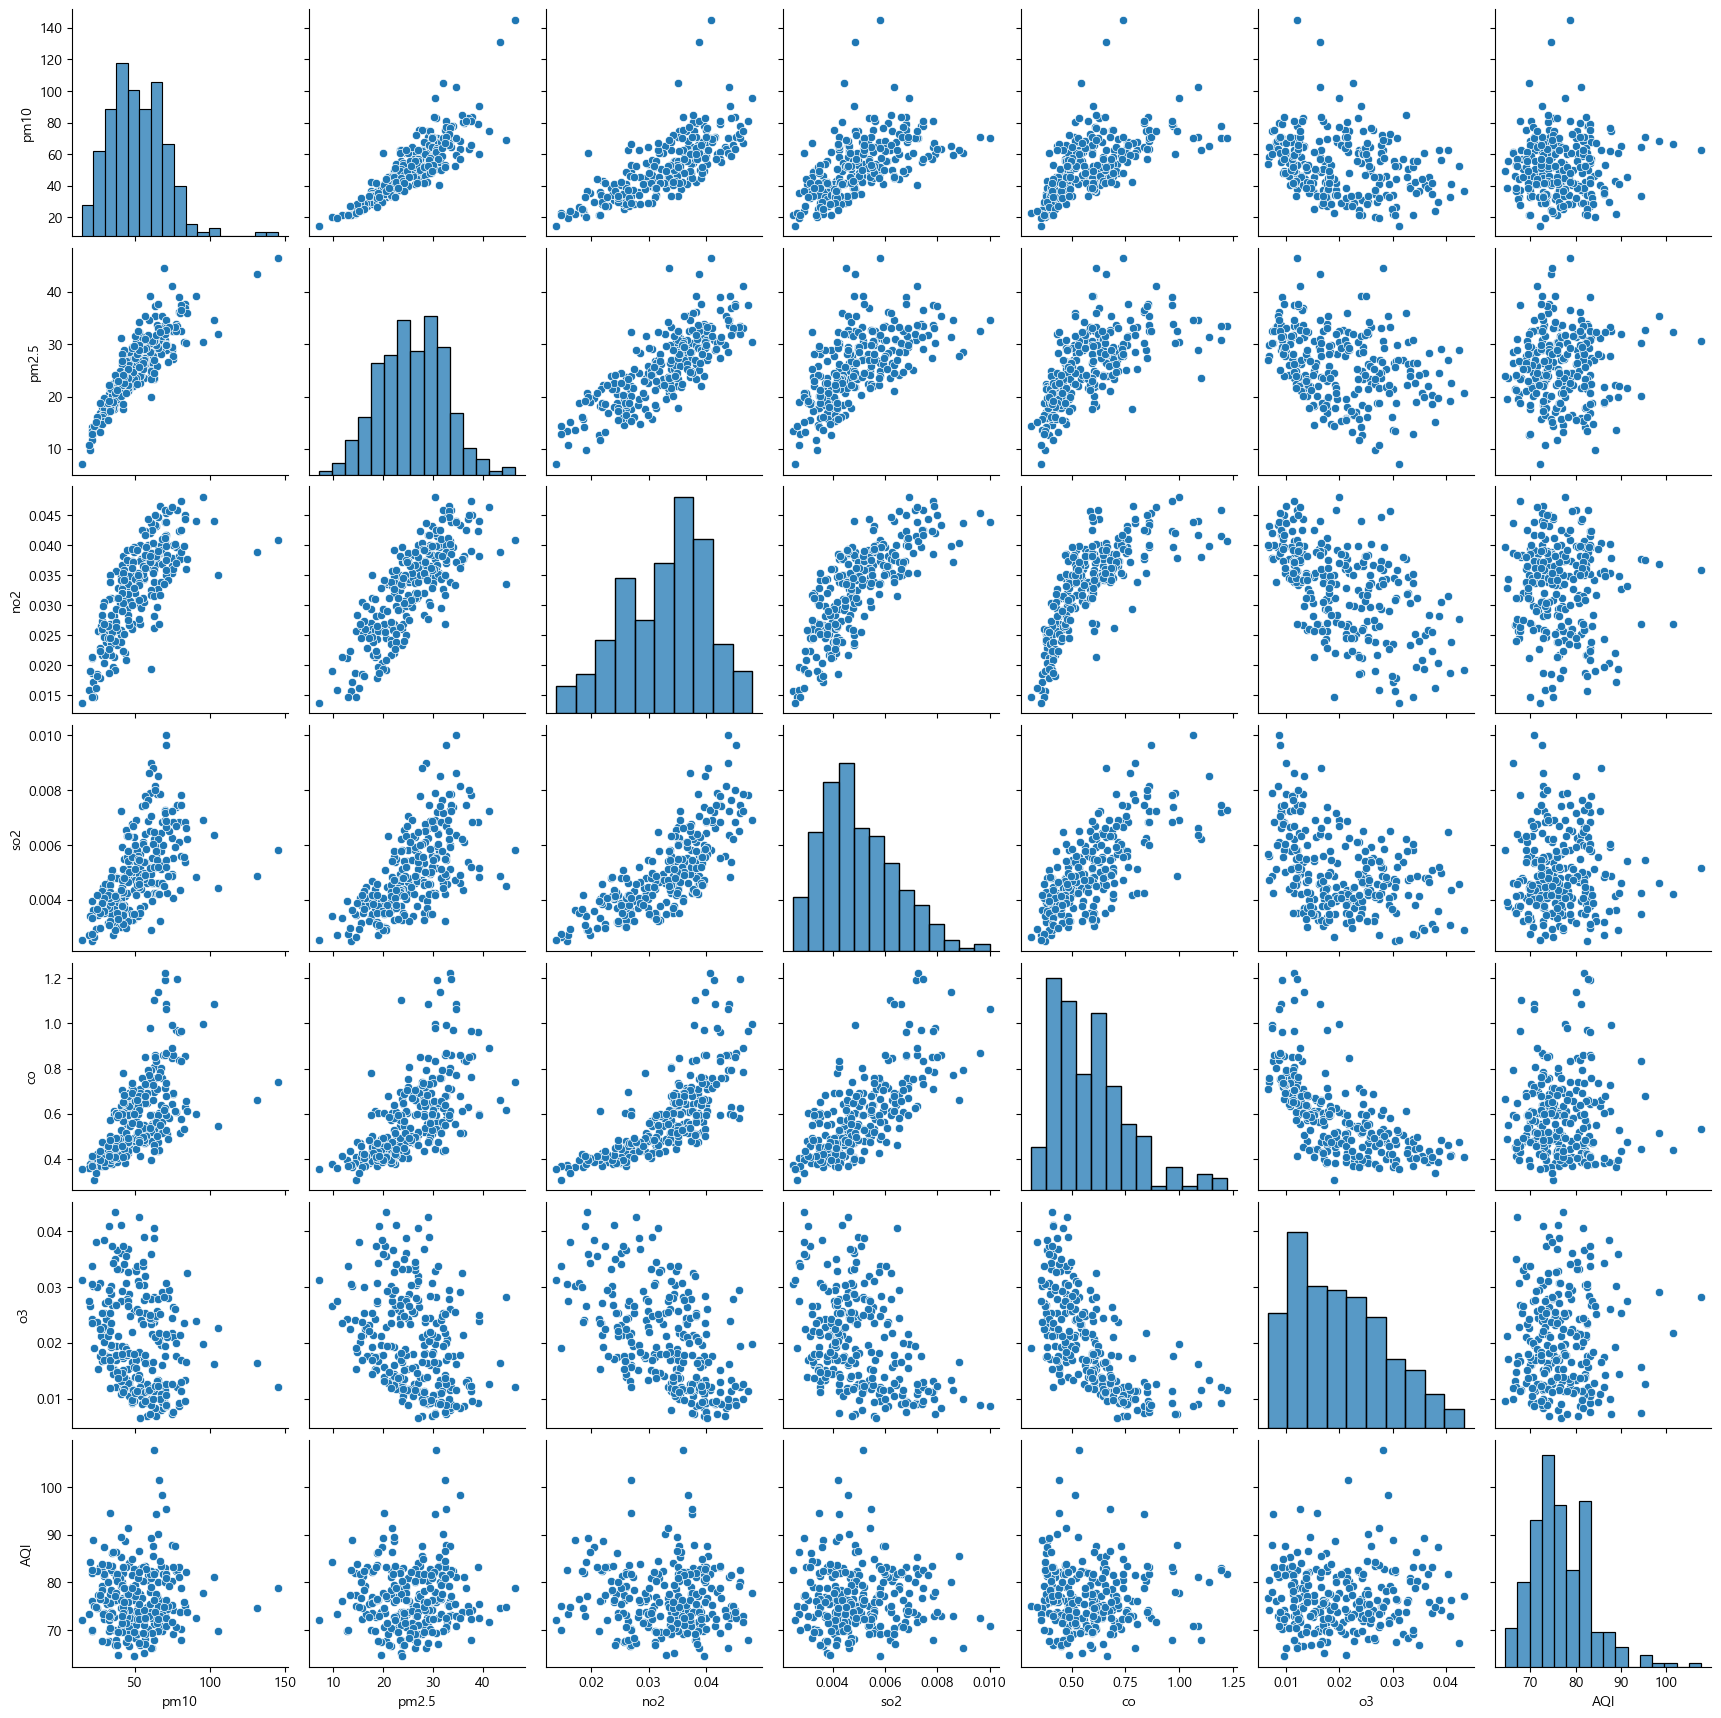

In [21]:
pair_data = recent_data.groupby(['year','month']).mean().loc[:,['pm10','pm2.5','no2','so2','co','o3','AQI']]
ax = sns.pairplot(data=pair_data)
plt.show()

##### -> PM10과 PM2.5간에는 가장 높은 선형성이  관찰되며, 다음으로는 no2와 co에서 유의미한 선형 관계를 확인할 수 있다.
##### 이외에도  PM과는 O3를 제외한 PM과 co, so2와 co, so2와 no2 등 다양한 변수 사이에서 선형 관계가 나타나며,
##### O3는 PM을 제외한 다른 변수들 사이에서 약간의  상관관계를 나타내므로 결국 대기 오염에는 모든 변수들이 복합적으로 작용한다는 것을 알 수 있다.
#### (AQI의 경우는 다양한 변수에 의해 결정되는 만큼 이렇다 할 선형성이 관찰되지는 않는다.)

## So2의 시간별 분류에 따른 변화

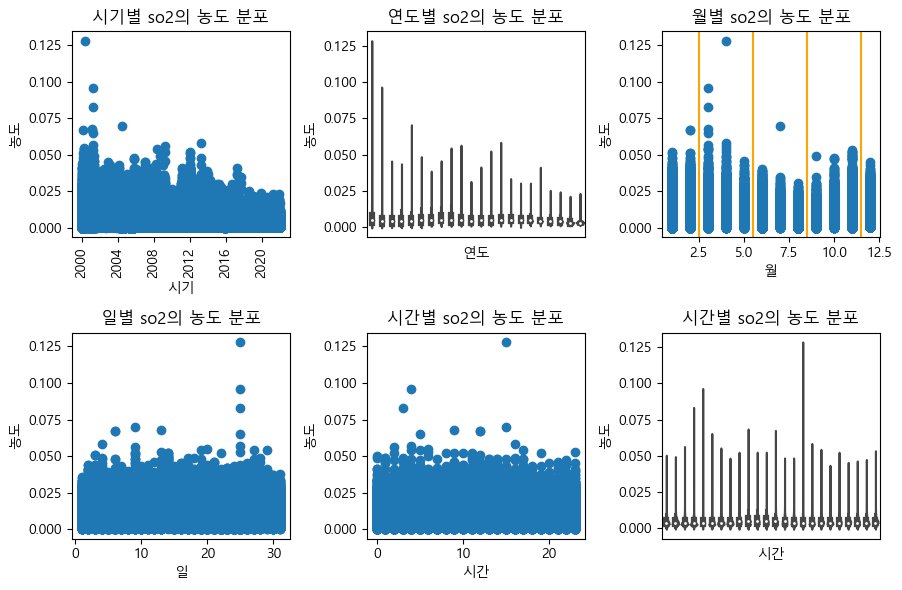

In [22]:
# timestamp, year, month, day, hour에 따른 So2 농도 
plt.figure(figsize=(9,6))
plt.subplot(2, 3, 1)
plt.title('시기별 so2의 농도 분포')
plt.scatter(recent_data['ts'],recent_data['so2'])
plt.xticks(rotation=90)
plt.xlabel('시기')
plt.ylabel('농도')

plt.subplot(2, 3, 2)
plt.title('연도별 so2의 농도 분포')
sns.violinplot(recent_data['year'],recent_data['so2'])
plt.xticks([])
plt.xlabel('연도')
plt.ylabel('농도')

plt.subplot(2, 3, 3)
plt.title('월별 so2의 농도 분포')
plt.scatter(recent_data['month'],recent_data['so2'])
plt.axvline(x=2.5,color='orange')
plt.axvline(x=5.5,color='orange')
plt.axvline(x=8.5,color='orange')
plt.axvline(x=11.5,color='orange')
plt.xlabel('월')
plt.ylabel('농도')

plt.subplot(2, 3, 4)
plt.title('일별 so2의 농도 분포')
plt.scatter(recent_data['day'],recent_data['so2'])
plt.xlabel('일')
plt.ylabel('농도')

plt.subplot(2, 3, 5)
plt.title('시간별 so2의 농도 분포')
plt.scatter(recent_data['hour'],recent_data['so2'])
plt.xlabel('시간')
plt.ylabel('농도')

plt.subplot(2, 3, 6)
plt.title('시간별 so2의 농도 분포')
sns.violinplot(recent_data['hour'],recent_data['so2'])
plt.xticks([])
plt.xlabel('시간')
plt.ylabel('농도')

plt.tight_layout()
plt.show()

##### -> 시기별 so2의 농도 분포를 통해 시간이 지날수록 so2의 농도 스펙트럼이 감소하며, 2000년대 초반에는 so2의 농도가 유난히 높은 시기가 있었음을 알 수 있다. 
##### violinplot을 통해 앞선 결과를 보다 뚜렷하게 확인할 수 있고, 일부 값들을 제외한 대부분의 값들은 저농도에 해당함을 알 수 있다.
##### 월별 농도 분포에서는 봄철에 대체로 높은 농도를, 여름철에 대체로 낮은 농도를 유지하는 것을 알 수 있다.
##### 시간별 농도 분포에서는 대체로 새벽과 일몰 직후 부근에서 하루 중 최대 농도를 나타내는 것을 알 수 있다.
##### (이외 일별 농도 분포에서는 유의미한 관계성을 얻지 못했다.)

## No2의 시간별 분류에 따른 변화

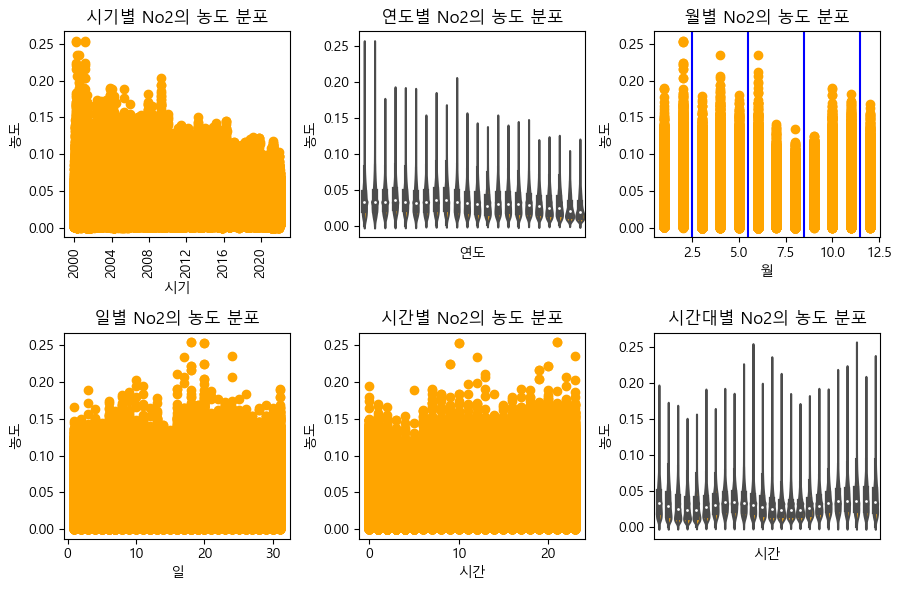

In [23]:
# timestamp, year, month, day, hour에 따른 No2 농도 
plt.figure(figsize=(9,6))
plt.subplot(2, 3, 1)
plt.title('시기별 No2의 농도 분포')
plt.scatter(recent_data['ts'],recent_data['no2'],color='orange')
plt.xticks(rotation=90)
plt.xlabel('시기')
plt.ylabel('농도')

plt.subplot(2, 3, 2)
plt.title('연도별 No2의 농도 분포')
sns.violinplot(recent_data['year'],recent_data['no2'],color='orange')
plt.xticks([])
plt.xlabel('연도')
plt.ylabel('농도')

plt.subplot(2, 3, 3)
plt.title('월별 No2의 농도 분포')
plt.scatter(recent_data['month'],recent_data['no2'],color='orange')
plt.axvline(x=2.5,color='blue')
plt.axvline(x=5.5,color='blue')
plt.axvline(x=8.5,color='blue')
plt.axvline(x=11.5,color='blue')
plt.xlabel('월')
plt.ylabel('농도')

plt.subplot(2, 3, 4)
plt.title('일별 No2의 농도 분포')
plt.scatter(recent_data['day'],recent_data['no2'],color='orange')
plt.xlabel('일')
plt.ylabel('농도')

plt.subplot(2, 3, 5)
plt.title('시간별 No2의 농도 분포')
plt.scatter(recent_data['hour'],recent_data['no2'],color='orange')
plt.xlabel('시간')
plt.ylabel('농도')

plt.subplot(2, 3, 6)
plt.title('시간대별 No2의 농도 분포')
sns.violinplot(recent_data['hour'],recent_data['no2'],color='orange')
plt.xticks([])
plt.xlabel('시간')
plt.ylabel('농도')

plt.tight_layout()
plt.show()

##### -> 연도별 no2의 농도 분포를 통해 시간이 지날수록 평균 대기중 no2 농도는 감소 추세임을 확인할 수 있다.
##### 월별 농도 분포에서는 여름철에 대체로 낮은 농도를 유지하는 것을 알 수 있다.
##### 시간별 농도 분포에서는 대체로 출근 시간과 퇴근 시간에 평균 농도가 높게 나타나고, 점심 시간에 평균 농도가 낮게 나타나는 것을 확인할 수 있다.
##### 시기별 No2의 농도 분포에 존재하는 2000년의 고농도 데이터가 일별 농도 분포에 영향을 미쳤음을 유추할 수 있고, No2가 높게 측정된 시기는 2000년  초반 겨울 중순의 날임을 유추할 수 있다.

## CO의 시간별 분류에 따른 변화

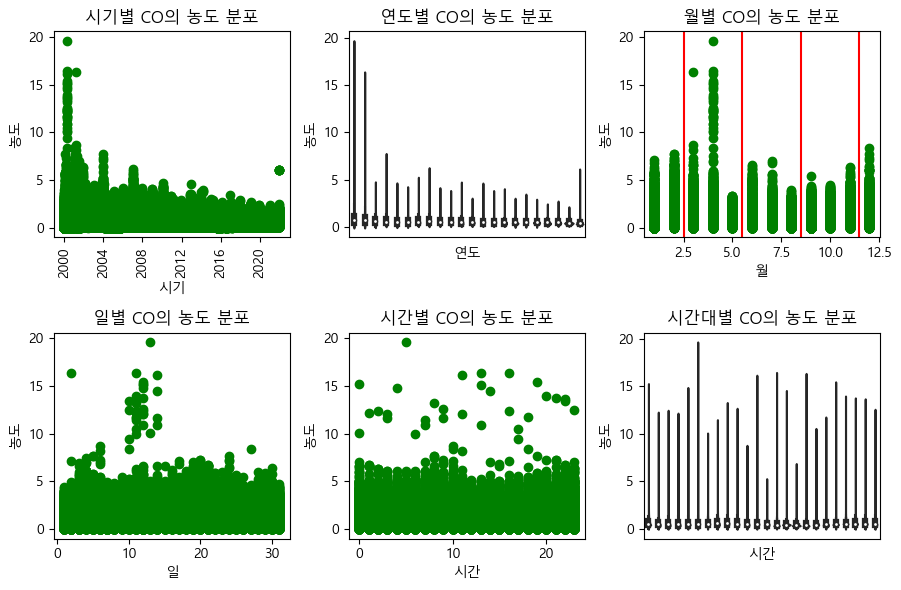

In [24]:
# timestamp, year, month, day, hour에 따른 CO 농도 
plt.figure(figsize=(9,6))
plt.subplot(2, 3, 1)
plt.title('시기별 CO의 농도 분포')
plt.scatter(recent_data['ts'],recent_data['co'],color='green')
plt.xticks(rotation=90)
plt.xlabel('시기')
plt.ylabel('농도')

plt.subplot(2, 3, 2)
plt.title('연도별 CO의 농도 분포')
sns.violinplot(recent_data['year'],recent_data['co'],color='green')
plt.xticks([])
plt.xlabel('연도')
plt.ylabel('농도')

plt.subplot(2, 3, 3)
plt.title('월별 CO의 농도 분포')
plt.scatter(recent_data['month'],recent_data['co'],color='green')
plt.axvline(x=2.5,color='red')
plt.axvline(x=5.5,color='red')
plt.axvline(x=8.5,color='red')
plt.axvline(x=11.5,color='red')
plt.xlabel('월')
plt.ylabel('농도')

plt.subplot(2, 3, 4)
plt.title('일별 CO의 농도 분포')
plt.scatter(recent_data['day'],recent_data['co'],color='green')
plt.xlabel('일')
plt.ylabel('농도')

plt.subplot(2, 3, 5)
plt.title('시간별 CO의 농도 분포')
plt.scatter(recent_data['hour'],recent_data['co'],color='green')
plt.xlabel('시간')
plt.ylabel('농도')

plt.subplot(2, 3, 6)
plt.title('시간대별 CO의 농도 분포')
sns.violinplot(recent_data['hour'],recent_data['co'],color='green')
plt.xticks([])
plt.xlabel('시간')
plt.ylabel('농도')

plt.tight_layout()
plt.show()

##### -> 앞선 결과들과 유사하게 시간이 지남에 따라 전반적으로 CO의 평균 농도는 감소 추세를 보인다. 또한, 마찬가지로 여름보다는 봄에 상대적으로     높은 농도를 나타내며, 시간대별 데이터에 있어서는 점심 시간 부근에서 최소를, 오전과 퇴근 시간에서 최대를 나타내는 모습을 보인다. 

## O3의 시간별 분류에 따른 변화

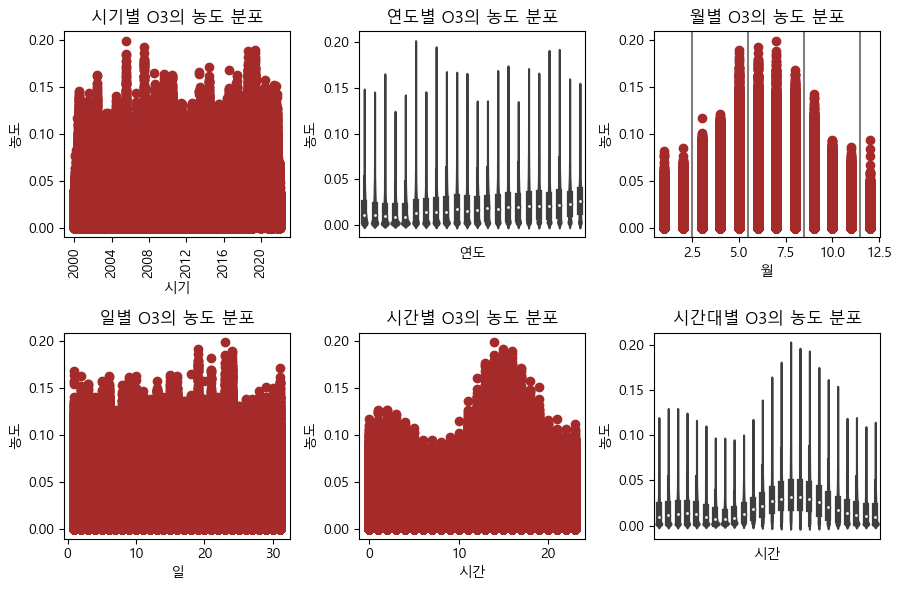

In [25]:
# timestamp, year, month, day, hour에 따른 O3 농도 
plt.figure(figsize=(9,6))
plt.subplot(2, 3, 1)
plt.title('시기별 O3의 농도 분포')
plt.scatter(recent_data['ts'],recent_data['o3'],color='brown')
plt.xticks(rotation=90)
plt.xlabel('시기')
plt.ylabel('농도')

plt.subplot(2, 3, 2)
plt.title('연도별 O3의 농도 분포')
sns.violinplot(recent_data['year'],recent_data['o3'],color='brown')
plt.xticks([])
plt.xlabel('연도')
plt.ylabel('농도')

plt.subplot(2, 3, 3)
plt.title('월별 O3의 농도 분포')
plt.scatter(recent_data['month'],recent_data['o3'],color='brown')
plt.axvline(x=2.5,color='gray')
plt.axvline(x=5.5,color='gray')
plt.axvline(x=8.5,color='gray')
plt.axvline(x=11.5,color='gray')
plt.xlabel('월')
plt.ylabel('농도')

plt.subplot(2, 3, 4)
plt.title('일별 O3의 농도 분포')
plt.scatter(recent_data['day'],recent_data['o3'],color='brown')
plt.xlabel('일')
plt.ylabel('농도')

plt.subplot(2, 3, 5)
plt.title('시간별 O3의 농도 분포')
plt.scatter(recent_data['hour'],recent_data['o3'],color='brown')
plt.xlabel('시간')
plt.ylabel('농도')

plt.subplot(2, 3, 6)
plt.title('시간대별 O3의 농도 분포')
sns.violinplot(recent_data['hour'],recent_data['o3'],color='brown')
plt.xticks([])
plt.xlabel('시간')
plt.ylabel('농도')

plt.tight_layout()
plt.show()

##### -> 시간이 지남에 따라 대기중 평균 O3의 농도는 점차 증가하고 있으며, 다른 물질들과는 다르게 여름철과 햇빛이 가장 뜨거운 오후 3시 부근에서 
##### 가장 높은 평균 농도를 갖는 것을 확인할 수 있다. 따라서 O3는 온도가 높은 경우에 보다 잘 형성된다는 것을 유추할 수 있다.

## PM10의 시간별 분류에 따른 변화

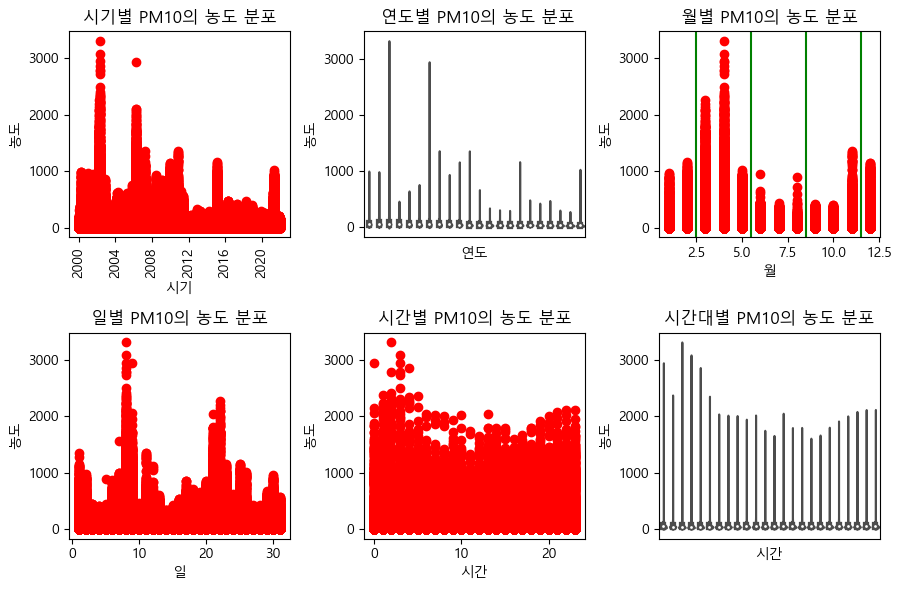

In [26]:
# timestamp, year, month, day, hour에 따른 PM10 농도 
plt.figure(figsize=(9,6))
plt.subplot(2, 3, 1)
plt.title('시기별 PM10의 농도 분포')
plt.scatter(recent_data['ts'],recent_data['pm10'],color='red')
plt.xticks(rotation=90)
plt.xlabel('시기')
plt.ylabel('농도')

plt.subplot(2, 3, 2)
plt.title(' 연도별 PM10의 농도 분포')
sns.violinplot(recent_data['year'],recent_data['pm10'],color='red')
plt.xticks([])
plt.xlabel('연도')
plt.ylabel('농도')

plt.subplot(2, 3, 3)
plt.title('월별 PM10의 농도 분포')
plt.scatter(recent_data['month'],recent_data['pm10'],color='red')
plt.axvline(x=2.5,color='green')
plt.axvline(x=5.5,color='green')
plt.axvline(x=8.5,color='green')
plt.axvline(x=11.5,color='green')
plt.xlabel('월')
plt.ylabel('농도')

plt.subplot(2, 3, 4)
plt.title('일별 PM10의 농도 분포')
plt.scatter(recent_data['day'],recent_data['pm10'],color='red')
plt.xlabel('일')
plt.ylabel('농도')

plt.subplot(2, 3, 5)
plt.title('시간별 PM10의 농도 분포')
plt.scatter(recent_data['hour'],recent_data['pm10'],color='red')
plt.xlabel('시간')
plt.ylabel('농도')

plt.subplot(2, 3, 6)
plt.title('시간대별 PM10의 농도 분포')
sns.violinplot(recent_data['hour'],recent_data['pm10'],color='red')
plt.xticks([])
plt.xlabel('시간')
plt.ylabel('농도')

plt.tight_layout()
plt.show()

##### -> 미세먼지에 해당하는 pm10의 농도는 연도별 pm10의 농도 분포 그래프를 통해 전반적으로 감소하고 있다고 설명할 수 있다.
##### 사이사이에 농도가 높게 나타나는 시점의 경우 황사가 발생하는 시점의 데이터임을 유추할 수 있고, 앞선 결과들과 마찬가지로 황사가 자주 발생하는 봄철의 월별 평균 농도가 다른 계절보다 높게 나타나는 것을 알 수 있다. 
##### 시간대별 농도 분포의 경우 새벽 시간대에 높은 농도가, 낮 시간대에 낮은 농도가 관측되는 것을 통해 바람이 상대적으로 적게 부는 시점에서의 평균 농도가 그렇지 않은 경우보다 높게 나타난다는 것을 유추할 수 있다.

## PM2.5의 시간별 분류에 따른 변화

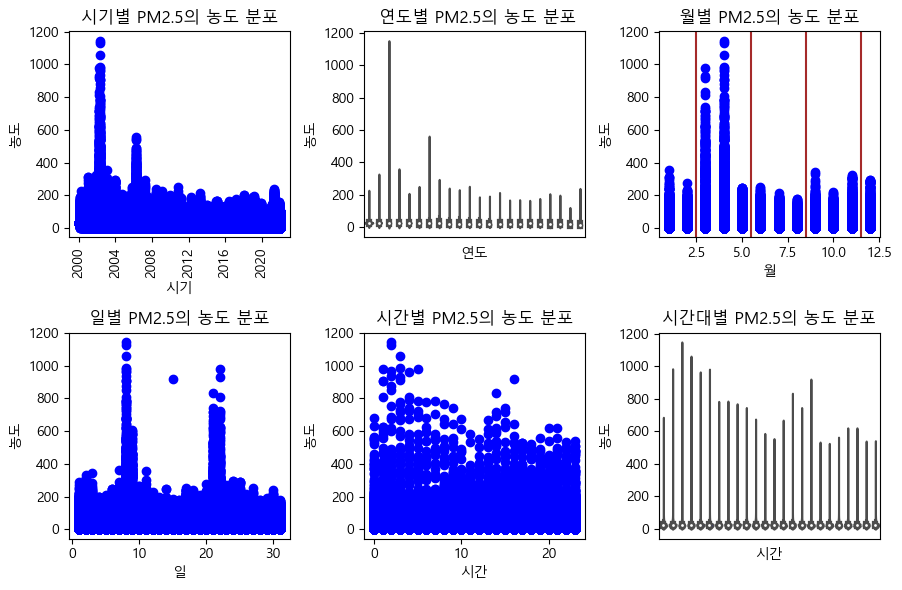

In [27]:
# timestamp, year, month, day, hour에 따른 PM2.5 농도 
plt.figure(figsize=(9,6))
plt.subplot(2, 3, 1)
plt.title('시기별 PM2.5의 농도 분포')
plt.scatter(recent_data['ts'],recent_data['pm2.5'],color='blue')
plt.xticks(rotation=90)
plt.xlabel('시기')
plt.ylabel('농도')

plt.subplot(2, 3, 2)
plt.title(' 연도별 PM2.5의 농도 분포')
sns.violinplot(recent_data['year'],recent_data['pm2.5'],color='blue')
plt.xticks([])
plt.xlabel('연도')
plt.ylabel('농도')

plt.subplot(2, 3, 3)
plt.title('월별 PM2.5의 농도 분포')
plt.scatter(recent_data['month'],recent_data['pm2.5'],color='blue')
plt.axvline(x=2.5,color='brown')
plt.axvline(x=5.5,color='brown')
plt.axvline(x=8.5,color='brown')
plt.axvline(x=11.5,color='brown')
plt.xlabel('월')
plt.ylabel('농도')

plt.subplot(2, 3, 4)
plt.title('일별 PM2.5의 농도 분포')
plt.scatter(recent_data['day'],recent_data['pm2.5'],color='blue')
plt.xlabel('일')
plt.ylabel('농도')

plt.subplot(2, 3, 5)
plt.title('시간별 PM2.5의 농도 분포')
plt.scatter(recent_data['hour'],recent_data['pm2.5'],color='blue')
plt.xlabel('시간')
plt.ylabel('농도')

plt.subplot(2, 3, 6)
plt.title('시간대별 PM2.5의 농도 분포')
sns.violinplot(recent_data['hour'],recent_data['pm2.5'],color='blue')
plt.xticks([])
plt.xlabel('시간')
plt.ylabel('농도')

plt.tight_layout()
plt.show()

##### -> 초미세먼지에 해당하는 pm2.5이므로 전반적인 그래프의 전반적인 개형과 특징들은 pm10과 유사하다.
##### 그러나, pm10과는 다르게 여름철보다는 가을철에 최대 농도가 관측되었다는 점, 해가 진 직후의 시점에 간혹 높은 농도가  나타난다는 점에서 차이가 존재한다.

## 각 변수들의 시간별 분류에 따른 변화 양상

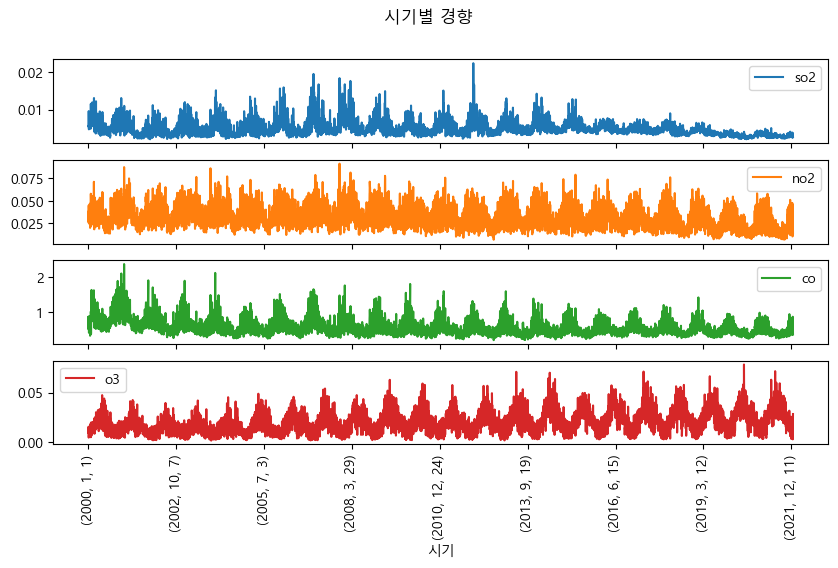

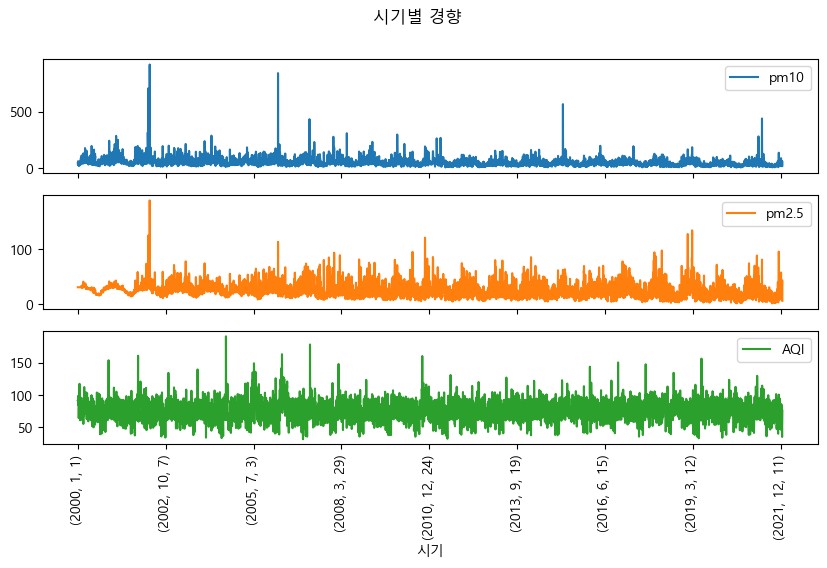

In [28]:
processed_data = recent_data.copy()
ts_df = processed_data.groupby(['year','month','day']).mean()

ts_df1 = ts_df.drop(columns=['loc','lat','long','hour', 'pm10','pm2.5','AQI'])
ts_df1.plot(subplots=True,title='시기별 경향',xlabel='시기',figsize=(10,5))
plt.xticks(rotation=90)

ts_df2 = ts_df.drop(columns=['loc','lat','long','hour','o3','no2','so2','co'])
ts_df2.plot(subplots=True,title='시기별 경향',xlabel='시기',figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

##### -> 앞선 결과에서 확인했듯이, so2, no2,co의 경우는 시간의 흐름에 따른 증감 패턴과 평균 농도가 감소한다는 유사점이 있는 것을 확인할 수 있으며,
##### 다른 변수들과는 다르게 여름에 가장 높은 농도를 나타냈던  o3의 경우는 앞선 변수들과의 증감 패턴은 유사하나, 앞선 변수들의 농도와 반대 방향으로 농도가 변화하는 모습을 확인할 수 있다.
##### pm10과 pm2.5의 경우는 대체로 유사한 주기와 패턴을 지녔으며, 농도가 높은 시점은 황사가 발생하는 봄 혹은 난방 사용량이 증가하는 겨울에 집중되어 있음을 확인할 수 있다.

## 시간별 분류에 따른 변수별 추세

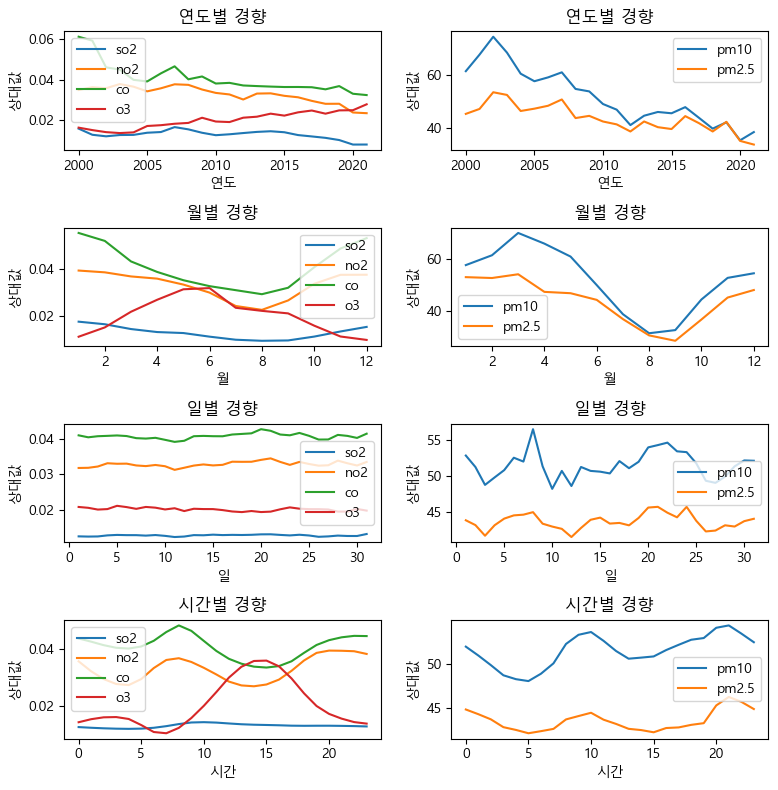

In [29]:
# 각 변수들의 시점별 평균을 통해 시간이 지남에 따라 어떠한 패턴이 관측되는지 확인한다.
processed_data = recent_data.copy()
processed_data['so2'] = processed_data['so2']*2.6 # 경향성을 한눈에 보기 위한 단위 조정 
processed_data['co'] = processed_data['co']*0.07 # 경향성을 한눈에 보기 위한 단위 조정 
processed_data['pm2.5'] = processed_data['pm2.5']*1.7 # 경향성을 한눈에 보기 위한 단위 조정
year_df = processed_data.groupby(['year']).mean() # 연도별 평균값 dataframe
month_df = processed_data.groupby(['month']).mean() # 월별 평균값 dataframe
day_df = processed_data.groupby(['day']).mean() # 일자별 평균값 dataframe
hour_df = processed_data.groupby(['hour']).mean() # 시간별 평균값 dataframe

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8,8))

year_df1 = year_df.drop(columns=['loc','lat','long','month','day','hour', 'pm10','pm2.5','AQI'])
year_df1.plot(ax=axes[0,0],title='연도별 경향',xlabel='연도',ylabel='상대값')

year_df2 = year_df.drop(columns=['loc','lat','long','month','day','hour','o3','no2','so2','co','AQI'])
year_df2.plot(ax=axes[0,1],title='연도별 경향',xlabel='연도',ylabel='상대값')


month_df1 = month_df.drop(columns=['loc','lat','long','year','day','hour', 'pm10','pm2.5','AQI'])
month_df1.plot(ax=axes[1,0],title='월별 경향',xlabel='월',ylabel='상대값')

month_df2 = month_df.drop(columns=['loc','lat','long','year','day','hour','o3','no2','so2','co','AQI'])
month_df2.plot(ax=axes[1,1],title='월별 경향',xlabel='월',ylabel='상대값')


day_df1 = day_df.drop(columns=['loc','lat','long','year','hour','month', 'pm10','pm2.5','AQI'])
day_df1.plot(ax=axes[2,0],title='일별 경향',xlabel='일',ylabel='상대값')

day_df2 = day_df.drop(columns=['loc','lat','long','year','month','hour','o3','no2','so2','co','AQI'])
day_df2.plot(ax=axes[2,1],title='일별 경향',xlabel='일',ylabel='상대값')


hour_df1 = hour_df.drop(columns=['loc','lat','long','year','month','day', 'pm10','pm2.5','AQI'])
hour_df1.plot(ax=axes[3,0],title='시간별 경향',xlabel='시간',ylabel='상대값')

hour_df2 = hour_df.drop(columns=['loc','lat','long','year','month','day','o3','no2','so2','co','AQI'])
hour_df2.plot(ax=axes[3,1],title='시간별 경향',xlabel='시간',ylabel='상대값')


fig.tight_layout()
fig.show()

##### -> 앞선 결과를 한눈에 확인하기 위해서 시간 분류 기준에 따른 group별 평균값을 통해 변수별 추세를 나타낸다.

## 날짜별 하루 평균 AQI

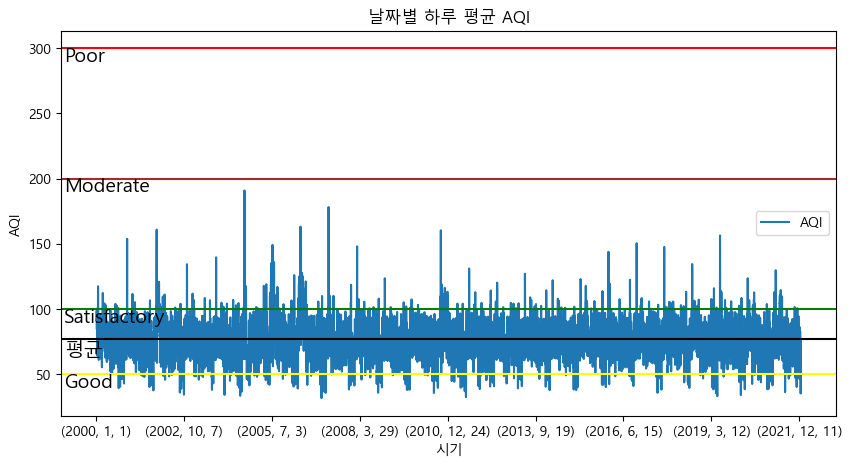

In [30]:
# 날짜별 하루 평균 AQI
aqi_df = processed_data.groupby(['year','month','day']).mean()
aqi_df = aqi_df.drop(columns=['loc','lat','long','hour', 'pm10','pm2.5','so2','co','no2','o3'])
aqi_df.plot(title='날짜별 하루 평균 AQI',xlabel='시기',ylabel='AQI',figsize=(10,5))
plt.axhline(y=50,color='yellow')
plt.text(-370, 40,'Good', fontdict={'size': 14})
plt.axhline(y=100,color='green')
plt.text(-370, 90,'Satisfactory', fontdict={'size': 14})
plt.axhline(y=200,color='brown')
plt.text(-370, 190,'Moderate', fontdict={'size': 14})
plt.axhline(y=300,color='red')
plt.text(-370, 290,'Poor', fontdict={'size': 14})
plt.axhline(y=76.7,color='black')
plt.text(-370, 64,'평균', fontdict={'size': 14})
plt.show()

##### -> 모든 변수들이 건강에 긍정적인 영향을 미치지는 않으며, 매 순간마다 농도는 실시간으로 변한다. 이를 종합적으로 반영하는 지표 AQI를 확인한다.
##### 날짜별 평균 AQI를 구한 뒤, 각 AQI에 해당하는 대기 상태를 그래프로 표현한 결과 서울시의 공기는 대부분 민감한 사람들이 호흡에 어려움을 겪을 수 있는 'satisfactory' 단계에 해당하는 것을 알 수 있다.

## 21년 간의 서울시의 대기 상태 분포

Satisfactory    3273977
Moderate         775393
Good             619417
Severe             3300
Poor               3077
Very Poor           953
Name: AQI_bucket_calculated, dtype: int64

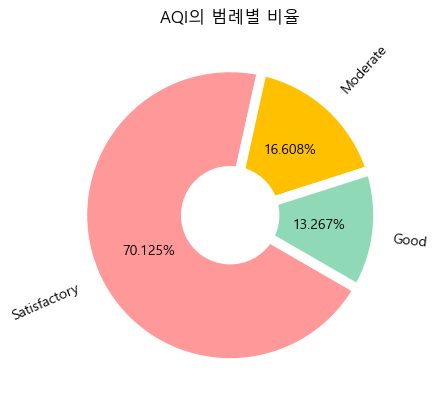

In [31]:
# 2000년부터 2021년까지 서울시의 평균적인 대기 상태 확인
display(processed_data['AQI_bucket_calculated'].value_counts())
key = processed_data['AQI_bucket_calculated'].value_counts().index[:3]
val = processed_data['AQI_bucket_calculated'].value_counts().values[:3]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 7}
plt.title('AQI의 범례별 비율')
plt.pie(val, labels=key, autopct='%.3f%%', startangle=330, counterclock=False, colors=colors, wedgeprops=wedgeprops,rotatelabels=True)
plt.show()

##### ->2000년부터 2021년까지의 전체 AQI에 따른 공기 상태는 Satisfactory가 3273977건, Moderate이 775393건,Good이 619417건,Severe이 3300건,
#####  Poor과 Very Poor이 각각 3077과 953건으로 대부분 안좋은 축에 속하는 것을 다시 한 번 확인할 수 있다.

## 시점에 따른 AQI의 특성

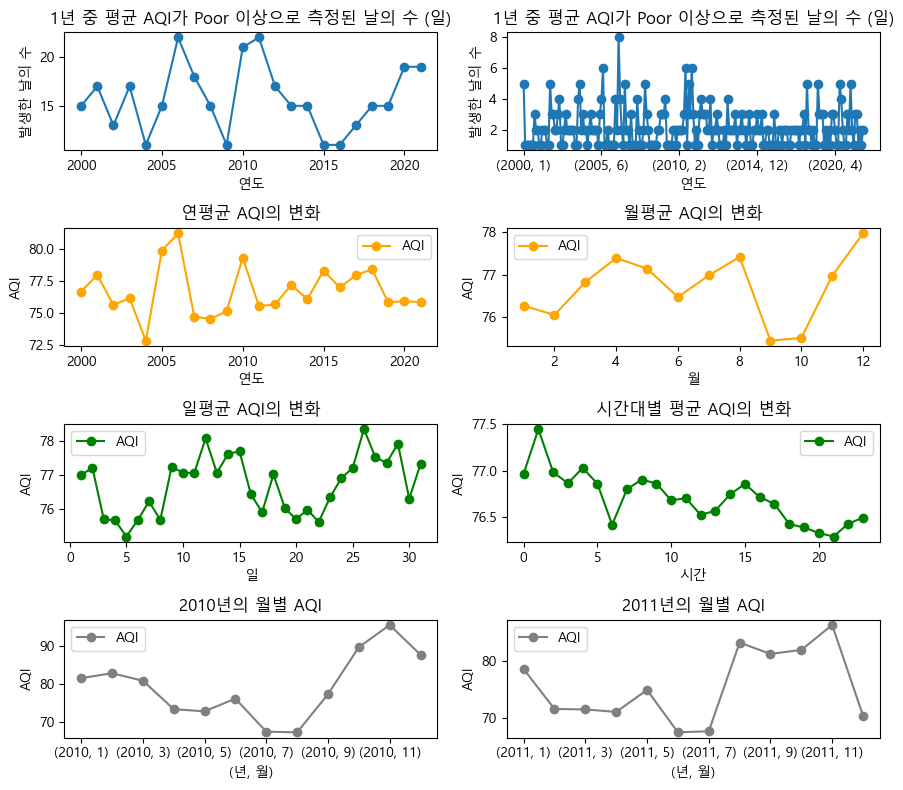

In [32]:
# 1년 중 대기 상태가 심각했던 날들의 분포
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(9,8))
aqi_bucket_df = processed_data[processed_data['AQI']>200] # poor

aqi_bucket_df1 = aqi_bucket_df.groupby(['year'])['day'].nunique()
aqi_bucket_df1.plot(ax=axes[0,0],title='1년 중 평균 AQI가 Poor 이상으로 측정된 날의 수 (일)',xlabel='연도',ylabel='발생한 날의 수',marker='o')

aqi_bucket_df2 = aqi_bucket_df.groupby(['year','month'])['day'].nunique()
aqi_bucket_df2.plot(ax=axes[0,1],title='1년 중 평균 AQI가 Poor 이상으로 측정된 날의 수 (일)',xlabel='연도',ylabel='발생한 날의 수',marker='o')

# 시간별 분류에 따른 AQI의 추세 분석
year_df3 = year_df.drop(columns=['loc','lat','long','month','day','hour', 'pm10','pm2.5','no2','so2','co','o3'])
year_df3.plot(ax=axes[1,0],title='연평균 AQI의 변화',xlabel='연도',ylabel='AQI',marker='o',color='orange')

month_df3 = month_df.drop(columns=['loc','lat','long','year','day','hour', 'pm10','pm2.5','no2','so2','co','o3'])
month_df3.plot(ax=axes[1,1],title='월평균 AQI의 변화',xlabel='월',ylabel='AQI',marker='o',color='orange')

day_df3 = day_df.drop(columns=['loc','lat','long','year','month','hour', 'pm10','pm2.5','no2','so2','co','o3'])
day_df3.plot(ax=axes[2,0],title='일평균 AQI의 변화',xlabel='일',ylabel='AQI',marker='o',color='green')

hour_df3 = hour_df.drop(columns=['loc','lat','long','year','month','day', 'pm10','pm2.5','no2','so2','co','o3'])
hour_df3.plot(ax=axes[2,1],title='시간대별 평균 AQI의 변화',xlabel='시간',ylabel='AQI',marker='o',color='green')

# 2010년과 2011년의 월평균 AQI 비교
aqi_df2 = processed_data[processed_data['year']==2010]
aqi_df2 = aqi_df2.groupby(['year','month']).mean()
aqi_df2 = aqi_df2.drop(columns=['loc','lat','long','hour', 'pm10','pm2.5','so2','co','no2','o3','day'])
aqi_df2.plot(ax=axes[3,0],title='2010년의 월별 AQI',xlabel='(년, 월)',ylabel='AQI',marker='o',color='gray')

aqi_df3 = processed_data[processed_data['year']==2011]
aqi_df3 = aqi_df3.groupby(['year','month']).mean()
aqi_df3 = aqi_df3.drop(columns=['loc','lat','long','hour', 'pm10','pm2.5','so2','co','no2','o3','day'])
aqi_df3.plot(ax=axes[3,1],title='2011년의 월별 AQI',xlabel='(년, 월)',ylabel='AQI',marker='o',color='gray')

fig.tight_layout()
plt.show()

##### -> 시간이 갈수록 서울시의 평균적인 공기 상태는 점차 감소하는 것을 확인할 수 있다.(2018~2021)
#####  서울의 공기 질이 가장 안좋았던 시점은 2001년과 2006년이며, 계절에 따라서는 봄철과 겨울철의 공기 상태가 대체로 다른 계절에 비해 좋지         않다.
#####  공기가 안정 상태에 접어들어 대류가 활발히 일어나지 않는 새벽 혹은 사람들의 활동이 잦은 낮시간에는 대체로 공기 상태가 좋지 않다. 
##### 조건에 따라 편차가 존재하므로, 평균값이 모든 경향을 설명하지는 못한다.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## AQI의 관측 지점에 따른 차이

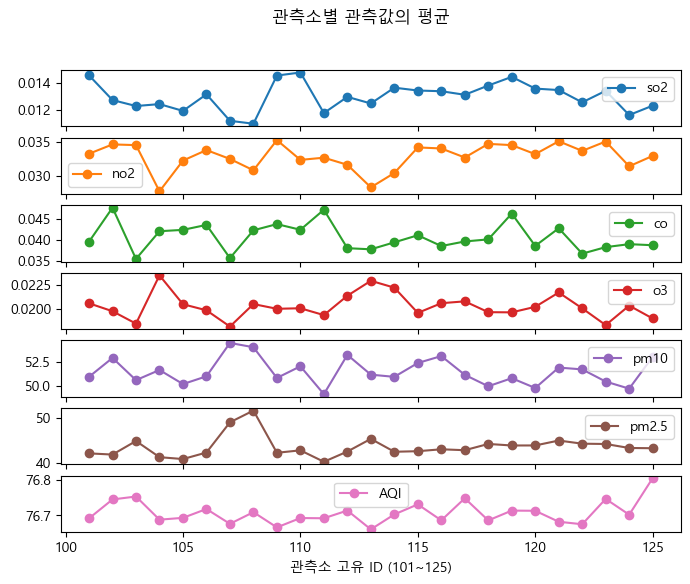

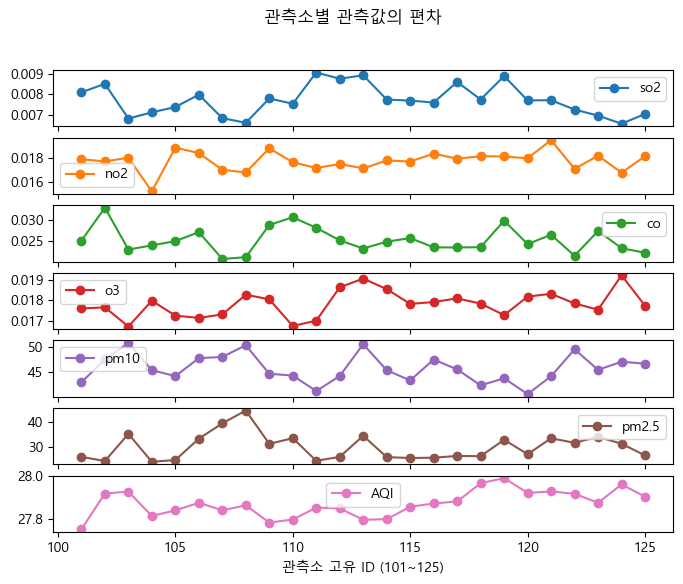

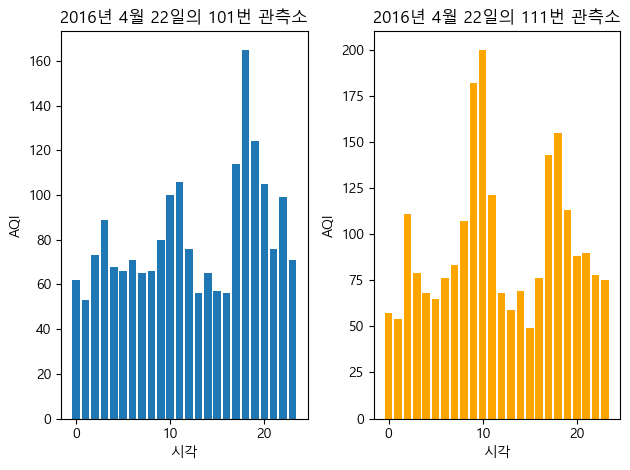

In [33]:
# 관측소별 관측값의 평균과 표준편차 분포
loc_data = recent_data.copy()
loc_df1 = processed_data.groupby(['loc']).mean()
loc_df2 = processed_data.groupby(['loc']).std()

loc_df1 = loc_df1.drop(columns=['lat','long','hour','day','year','month'])
loc_df1.plot(subplots=True, title='관측소별 관측값의 평균',xlabel='관측소 고유 ID (101~125)',marker='o',figsize=(8,6))
loc_df2 = loc_df2.drop(columns=['lat','long','hour','day','year','month'])
loc_df2.plot(subplots=True, title='관측소별 관측값의 편차',xlabel='관측소 고유 ID (101~125)',marker='o',figsize=(8,6))
plt.show()

# 편차가 큰 101, 111번 관측소의 2016년 4월 22일 시간에 따른 AQI 비교
unique_data = processed_data[processed_data['year']==2016]
unique_data = unique_data[unique_data['month']==4]
unique_data = unique_data[unique_data['day']==22]
loc_101 = unique_data[unique_data['loc']==101]
loc_111 = unique_data[unique_data['loc']==111]

plt.subplot(1, 2, 1)
plt.title('2016년 4월 22일의 101번 관측소')
plt.bar(loc_101['hour'],loc_101['AQI'])
plt.xlabel('시각')
plt.ylabel('AQI')

plt.subplot(1, 2, 2)
plt.title('2016년 4월 22일의 111번 관측소')
plt.bar(loc_111['hour'],loc_111['AQI'],color='orange')
plt.xlabel('시각')
plt.ylabel('AQI')

plt.tight_layout()
plt.show()

##### -> 관측소의 위치에 따라서도 측정값은 얼마든지 달라질 수 있으므로, 관측소를 기준으로 변수들의 group별 평균과 표준편차를 구해보면
##### 데이터간 편차는 101번 관측소에서 가장 적고, 111번 관측소에서 가장 크게 나타나는 것을 알 수 있으며, 2016년 4월 22일의 데이터를 기준으로
##### 시간별 AQI를 나타내보면 동일한 시간이더라도 관측소의 위치에 따라 측정값이 얼마든지 달라질 수 있다는 것을 알 수 있다.

## 관측 지점에 따른 데이터 시각화

In [34]:
#tkinter 생성
tk = Tk()
tk.title("Map")
tk.geometry("580x340")
tk.resizable(False, False)

#기본데이터
base_day = recent_data[recent_data['ts'] == '2000-01-01 00:00:00']
seoul = [37.5600, 126.9900]
m = Map(location=seoul, tiles='openstreetmap', zoom_start=12)
is_so2 = IntVar()
is_no2 = IntVar()
is_co = IntVar()
is_o3 = IntVar()
is_pm10 = IntVar()
is_pm25 = IntVar()

#Map을 만들어서 html파일로 저장
def makemap(date):
    for idx, row in date.iterrows():
        #popupstring 만들기
        popupstring = "<h1>AQI: {0:0.2f}<h1>".format(row['AQI'])
        if is_so2.get() == 1:
            if row['so2'] > 0.15:
                popupstring += "<p>SO2: 매우나쁨</p>"
            elif row['so2'] > 0.05:
                popupstring += "<p>SO2: 나쁨</p>"
            elif row['so2'] > 0.02:
                popupstring += "<p>SO2: 보통</p>"
            else:
                popupstring += "<p>SO2: 좋음</p>"
        if is_co.get() == 1:
            if row['co'] > 15:
                popupstring += "<p>CO: 매우나쁨</p>"
            elif row['co'] > 9:
                popupstring += "<p>CO: 나쁨</p>"
            elif row['co'] > 2:
                popupstring += "<p>CO: 보통</p>"
            else:
                popupstring += "<p>CO: 좋음</p>" 
        if is_o3.get() == 1:
            if row['o3'] > 0.15:
                popupstring += "<p>O3: 매우나쁨</p>"
            elif row['o3'] > 0.09:
                popupstring += "<p>O3: 나쁨</p>"
            elif row['o3'] > 0.03:
                popupstring += "<p>O3: 보통</p>"
            else:
                popupstring += "<p>O3: 좋음</p>" 
        if is_no2.get() == 1:
            if row['no2'] > 0.2:
                popupstring += "<p>NO2: 매우나쁨</p>"
            elif row['no2'] > 0.06:
                popupstring += "<p>NO2: 나쁨</p>"
            elif row['no2'] > 0.03:
                popupstring += "<p>NO2: 보통</p>"
            else:
                popupstring += "<p>NO2: 좋음</p>" 
        if is_pm10.get() == 1:
            if row['pm10'] > 150:
                popupstring += "<p>PM10: 매우나쁨</p>"
            elif row['pm10'] > 80:
                popupstring += "<p>PM10: 나쁨</p>"
            elif row['pm10'] > 30:
                popupstring += "<p>PM10: 보통</p>"
            else:
                popupstring += "<p>PM10: 좋음</p>"
        if is_pm25.get() == 1:
            if row['pm2.5'] > 75:
                popupstring += "<p>PM2.5: 매우나쁨</p>"
            elif row['pm2.5'] > 35:
                popupstring += "<p>PM2.5: 나쁨</p>"
            elif row['pm2.5'] > 0.02:
                popupstring += "<p>PM2.5: 보통</p>"
            else:
                popupstring += "<p>PM2.5: 좋음</p>"
        popupstring = Popup(popupstring, min_width=200, max_width=200) 

        #맵에 마커 출력                                                                           
        if(row['AQI_bucket_calculated'] == 'Good'):
            Marker([row['lat'], row['long']], popup=popupstring, icon=Icon(color = 'blue')).add_to(m)
        elif(row['AQI_bucket_calculated'] == 'Satisfactory'):
            Marker([row['lat'], row['long']], popup=popupstring, icon=Icon(color = 'green')).add_to(m)
        elif(row['AQI_bucket_calculated'] == 'Moderate'):
            Marker([row['lat'], row['long']], popup=popupstring, icon=Icon(color = 'beige')).add_to(m)
        elif(row['AQI_bucket_calculated'] == 'Poor'):
            Marker([row['lat'], row['long']], popup=popupstring, icon=Icon(color = 'orange')).add_to(m)
        elif(row['AQI_bucket_calculated'] == 'VeryPoor'):
            Marker([row['lat'], row['long']], popup=popupstring, icon=Icon(color = 'lightred')).add_to(m)
        elif(row['AQI_bucket_calculated'] == 'Severe'):
            Marker([row['lat'], row['long']], popup=popupstring, icon=Icon(color = 'red')).add_to(m)    
    #저장
    m.save('./씽크빅팀/map.html')

    
#처음에만 실행
makemap(base_day) 
driver = webdriver.Chrome('./씽크빅팀/chromedriver.exe')
driver.implicitly_wait(10)
driver.get('file:////{}/씽크빅팀/map.html'.format(Jupyter_path))


#refresh 버튼 누를 시 (데이터로 새로운 맵 생성/새로고침)
def refreshmap():
    daystring = get_input()
    if daystring == False:
        return
    new_day = recent_data[recent_data['ts'] == daystring]
    makemap(new_day)
    driver.refresh()

#refresh 버튼 누를 시 (입력 받기)
def get_input():

    year = inputyear.get()
    month = inputmonth.get()
    day = inputday.get()
    hour = inputhour.get()

    daystring = str(year) + "-" + str(month) + "-" + str(day) + " " + str(hour) + ":00:00"

    return daystring


#라벨
labelyear = Label(tk,text='년 (2000 ~ 2021)').grid(row=0, column=0)
labelmonth = Label(tk,text='월 (1 ~ 12)').grid(row=1,column=0)
labelday = Label(tk,text='일 (1 ~ 31)').grid(row=2,column=0)
labelhour = Label(tk,text='시 (0 ~ 23)').grid(row=3,column=0)
labelhelp = Label(tk, text='설명').grid(row=5,column=0, columnspan=4)
labelhelp = Label(tk, text='1. 슬라이더를 통해 원하는 연도, 월, 일, 시간을 고릅니다.').grid(row=6, columnspan=4)
labelhelp = Label(tk, text='2. 체크박스를 통해 추가로 보고 싶은 지표를 고릅니다.').grid(row=7, columnspan=4)
labelhelp = Label(tk, text='3. Refresh 버튼을 누르면 지도에 선택한 사항이 적용됩니다.').grid(row=8, columnspan=4)
labelhelp = Label(tk, text='지표의 좋고 나쁜 정도는 airkorea.or.kr의 지표를 반영했습니다.').grid(row=9, columnspan=4)
labelhelp = Label(tk, text='※마커의 색깔은 AQI를 나타냅니다.').grid(row=10, columnspan=4)
labelhelp = Label(tk, text='(파랑: Good, 초록: Satisfactory, 베이지: Moderate, 주황: Poor, 연빨강: VeryPoor, 빨강: Severe)').grid(row=11, columnspan=4)


#슬라이더
inputyear = Scale(tk, from_=2000, to=2021, orient=HORIZONTAL, length=300)
inputyear.grid(row=0,column=1) 
inputmonth = Scale(tk, from_=1, to=12, orient=HORIZONTAL, length=300)
inputmonth.grid(row=1,column=1)  
inputday = Scale(tk, from_=1, to=31, orient=HORIZONTAL, length=300)
inputday.grid(row=2,column=1)   
inputhour = Scale(tk, from_=0, to=23, orient=HORIZONTAL, length=300)
inputhour.grid(row=3,column=1)  

#버튼
makebutton = Button(tk, text='Refresh', command=refreshmap).grid(row=4, columnspan=4)


#체크박스
checkso2 = Checkbutton(tk, text="so2", variable=is_so2)
checkso2.grid(row=0, column=2)
checkco = Checkbutton(tk, text="co", variable=is_co)
checkco.grid(row=1, column=2)
checko3 = Checkbutton(tk, text="o3", variable=is_o3)
checko3.grid(row=2, column=2)
checkno2 = Checkbutton(tk, text="no2", variable=is_no2)
checkno2.grid(row=3, column=2)
checkpm10 = Checkbutton(tk, text="pm10", variable=is_pm10)
checkpm10.grid(row=0, column=3)
checkpm25 = Checkbutton(tk, text="pm2.5", variable=is_pm25)
checkpm25.grid(row=1, column=3)


tk.mainloop()

##### -> folium에서 맵과 마커를 생성하고 이를 html파일로 저장한 다음 selenium이 chrome driver을 통해 chrome으로 해당 html파일 open
##### tkinter로 입력받은 값대로 맵에 마커를 생성하고 html파일을 새로 저장하는 방식

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## 2015년 ~ 2021년 호흡기 환자 수 Data Import

In [35]:
# 2015년 ~ 2021년 호흡기 환자 수 데이터 import 
# [DataSet] : https://www.kdca.go.kr/npt/biz/npp/iss/ariStatisticsMain.do
hospital_df = pd.read_csv('{}/hospital.csv'.format(file_path))
st_row = hospital_df.columns # 1행이 column 지정되어있음
st = {'year':2015,'week':1,'germ1':1214,'germ2':161,'vir1':7,'vir2':70,'vir3':17,'vir4':16,'vir5':577,'vir6':156,'vir7':8,'vir8':153,'vir9':49,'vir10':0}
col_list=['year','week','germ1','germ2','vir1','vir2','vir3','vir4','vir5','vir6','vir7','vir8','vir9','vir10']
hospital_df.columns=col_list # column 수정
hospital_df = hospital_df.append(st,ignore_index=True) # 1행 데이터 추가
hospital_df = hospital_df.drop(columns='vir10')
display(hospital_df.head())
print(hospital_df.info())


# 전체 환자 수에 대한 파생변수 sum 생성
hospital_df['germ_sum'] = hospital_df['germ1'] + hospital_df['germ2']
hospital_df['vir_sum'] = hospital_df['vir1'] + hospital_df['vir2'] + hospital_df['vir3'] + hospital_df['vir4'] + hospital_df['vir5'] + hospital_df['vir6'] + hospital_df['vir7'] + hospital_df['vir8'] + hospital_df['vir9']
hospital_df['all_sum'] = hospital_df['vir_sum'] + hospital_df['germ_sum']

,year,week,germ1,germ2,vir1,vir2,vir3,vir4,vir5,vir6,vir7,vir8,vir9
0,2015,2,1114,149,13,90,13,8,519,136,14,70,102
1,2015,3,1139,141,7,70,9,19,387,130,17,53,306
2,2015,4,1025,128,15,78,11,14,281,164,43,43,248
3,2015,5,1002,145,10,56,9,19,299,170,19,43,232
4,2015,6,1052,161,10,60,17,18,213,189,22,37,325


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    365 non-null    int64
 1   week    365 non-null    int64
 2   germ1   365 non-null    int64
 3   germ2   365 non-null    int64
 4   vir1    365 non-null    int64
 5   vir2    365 non-null    int64
 6   vir3    365 non-null    int64
 7   vir4    365 non-null    int64
 8   vir5    365 non-null    int64
 9   vir6    365 non-null    int64
 10  vir7    365 non-null    int64
 11  vir8    365 non-null    int64
 12  vir9    365 non-null    int64
dtypes: int64(13)
memory usage: 37.2 KB
None


## 대기 중 유해물질의 농도와 호흡기 질환 환자 수 간의 상관관계 분석 (가설 검증)

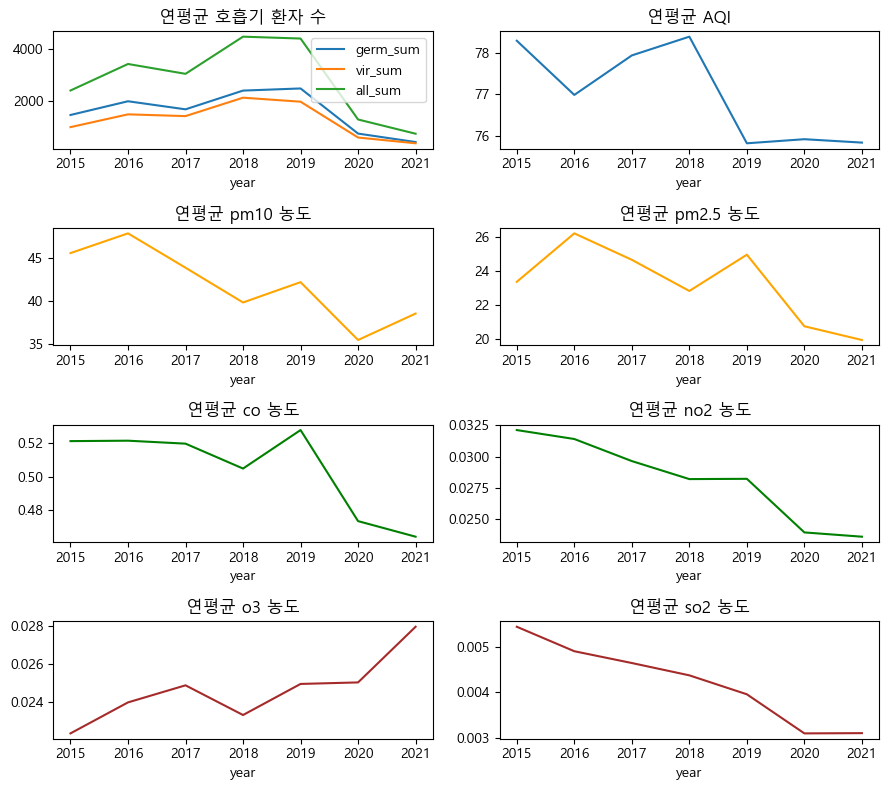

In [36]:
# 연평균 세균 혹은 바이러스에 따른 호흡기 질환 환자 수
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(9,8))
year_hos = hospital_df.groupby(['year']).mean()
year_hos = year_hos.iloc[:,-3:]
year_hos.plot(ax=axes[0,0],title='연평균 호흡기 환자 수')


# 연평균 AQI, pm10, pm2.5, co 등의 농도
processed_data = recent_data.copy()
pol_df1 = processed_data[processed_data['year']>2014].groupby('year')['AQI'].mean()
pol_df2 = processed_data[processed_data['year']>2014].groupby('year')['pm10'].mean()
pol_df3 = processed_data[processed_data['year']>2014].groupby('year')['pm2.5'].mean()
pol_df4 = processed_data[processed_data['year']>2014].groupby('year')['co'].mean()
pol_df5 = processed_data[processed_data['year']>2014].groupby('year')['no2'].mean()
pol_df6 = processed_data[processed_data['year']>2014].groupby('year')['o3'].mean()
pol_df7 = processed_data[processed_data['year']>2014].groupby('year')['so2'].mean()
pol_df1.plot(ax=axes[0,1],title='연평균 AQI')
pol_df2.plot(ax=axes[1,0],title='연평균 pm10 농도',color='orange')
pol_df3.plot(ax=axes[1,1],title='연평균 pm2.5 농도',color='orange')
pol_df4.plot(ax=axes[2,0],title='연평균 co 농도',color='green')
pol_df5.plot(ax=axes[2,1],title='연평균 no2 농도',color='green')
pol_df6.plot(ax=axes[3,0],title='연평균 o3 농도',color='brown')
pol_df7.plot(ax=axes[3,1],title='연평균 so2 농도',color='brown')

plt.tight_layout()
plt.show()

##### -> 변수별 연평균 농도와 연평균 호흡기 환자 수의 변화를 비교하면 AQI와 pm의 경우는 연평균 호흡기 환자의 수와 몇몇 비슷한 부분이 보이지만,
##### 이정도의 우연성으로는 안좋은 공기가 호흡기 질환 환자 수의 증가에 영향을 미쳤다고 설명하기 어렵다.

## 황사가 발생하는 주간(4월 초~6월 초) 동안의 상관관계 분석

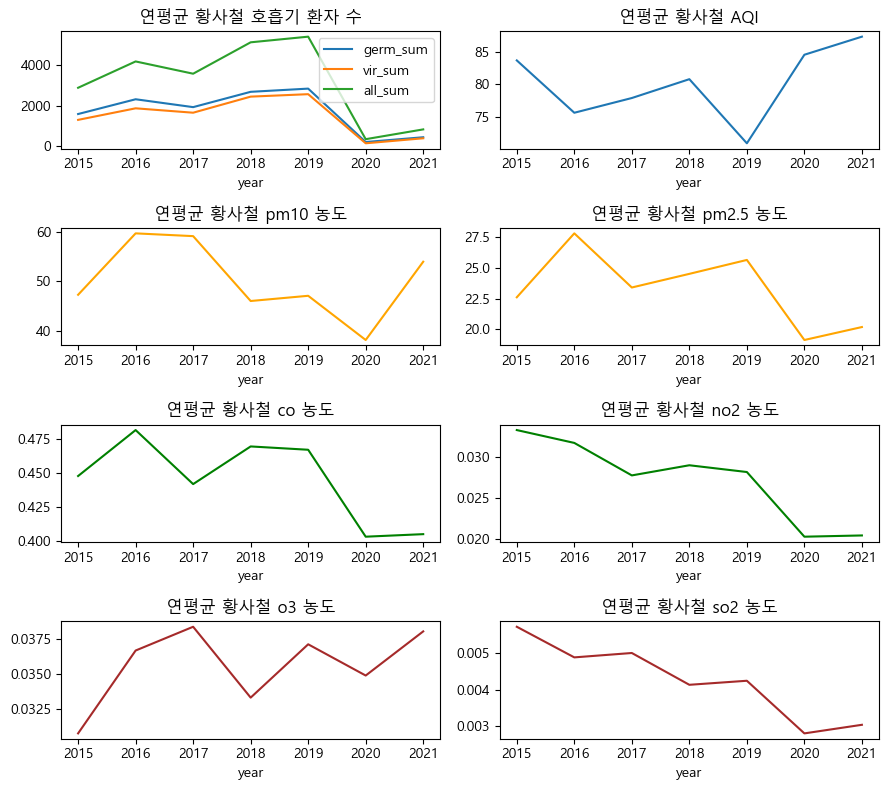

In [37]:
# 황사가 발생하는 4월 초 ~ 6월 초에 해당하는 15주~22주 사이의 비교분석
check_hospital_df = hospital_df[(hospital_df['week']>=15)&(hospital_df['week']<=22)]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(9,8))
year_hos = check_hospital_df.groupby(['year']).mean()
year_hos = year_hos.iloc[:,-3:]
year_hos.plot(ax=axes[0,0],title='연평균 황사철 호흡기 환자 수')


# 황사철 연평균 AQI, pm10, pm2.5, co 등의 농도
processed_data = recent_data.copy()
processed_data['week'] = processed_data['ts'].map(lambda x: x.isocalendar()[1])

pol_df1 = processed_data[(processed_data['year']>2014)&(processed_data['week']>=15)&(processed_data['week']<=22)].groupby('year')['AQI'].mean()
pol_df2 = processed_data[(processed_data['year']>2014)&(processed_data['week']>=15)&(processed_data['week']<=22)].groupby('year')['pm10'].mean()
pol_df3 = processed_data[(processed_data['year']>2014)&(processed_data['week']>=15)&(processed_data['week']<=22)].groupby('year')['pm2.5'].mean()
pol_df4 = processed_data[(processed_data['year']>2014)&(processed_data['week']>=15)&(processed_data['week']<=22)].groupby('year')['co'].mean()
pol_df5 = processed_data[(processed_data['year']>2014)&(processed_data['week']>=15)&(processed_data['week']<=22)].groupby('year')['no2'].mean()
pol_df6 = processed_data[(processed_data['year']>2014)&(processed_data['week']>=15)&(processed_data['week']<=22)].groupby('year')['o3'].mean()
pol_df7 = processed_data[(processed_data['year']>2014)&(processed_data['week']>=15)&(processed_data['week']<=22)].groupby('year')['so2'].mean()
pol_df1.plot(ax=axes[0,1],title='연평균 황사철 AQI')
pol_df2.plot(ax=axes[1,0],title='연평균 황사철 pm10 농도',color='orange')
pol_df3.plot(ax=axes[1,1],title='연평균 황사철 pm2.5 농도',color='orange')
pol_df4.plot(ax=axes[2,0],title='연평균 황사철 co 농도',color='green')
pol_df5.plot(ax=axes[2,1],title='연평균 황사철 no2 농도',color='green')
pol_df6.plot(ax=axes[3,0],title='연평균 황사철 o3 농도',color='brown')
pol_df7.plot(ax=axes[3,1],title='연평균 황사철 so2 농도',color='brown')

plt.tight_layout()
plt.show()

##### -> 확실하게 공기가 좋지 않은 시점(황사 발생 및 대부분 변수들의 농도가 높은 봄철[15주~22주])에 한정해서 연평균 그래프를 비교해보면
##### 앞선 결과와 달리, 연평균 pm10, pm2.5, co 농도의 증감과 연평균 호흡기 질환 환자 수의 증감 방향이 일치하는 것을 확인할 수 있다.
##### 따라서, 안좋은 공기는 시민들의 호흡기에 부정적인 영향을 미친다는 점은 부분적으로나마 설명되며
##### 날짜간 날씨 속성이 고려되지 못했다는 점과 추가적인 데이터나 다른 속성들에 대한 비교가 진행되지 않았다는 점은 아쉽지만  
##### 이와 같은 특정한 상황을 통해 가설을 확인해볼 수 있었다는 점에서 의미가 크다고 생각한다.

### 높은 대기 중 오염물질 농도는 호흡기를 약하게 만들어 호흡기 환자의 수를 늘릴 것이라는 가설은 실제와 일치하며, 
### 각 오염물질들은 시간 속성에 대해 일정한 패턴이나 경향성을 나타낸다는 것을 확인할 수 있다. 